<h1><center>Project 2: Creating Customer Segments</center></h1>

<center>Dao Duc Chinh - chinhdao89@gmail.com - Tokushima, Japan</center>

In [202]:
import numpy as np
import pandas as pd

# read data from csv file
customer_df = pd.read_csv('data/customers.csv')
print(customer_df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  


In [203]:
customer_df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

There is no missing value in this DataFrame

## Remove two columns Channel and Region, then clustering based on other columns data

In [204]:
channel_column = customer_df['Channel']
region_column = customer_df['Region']

In [205]:
customer_product_df = customer_df.drop(['Channel', 'Region'], axis=1)
print(customer_product_df.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Draw histogram of each column

In [206]:
column_name_list = customer_product_df.columns.values
print(column_name_list)

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']


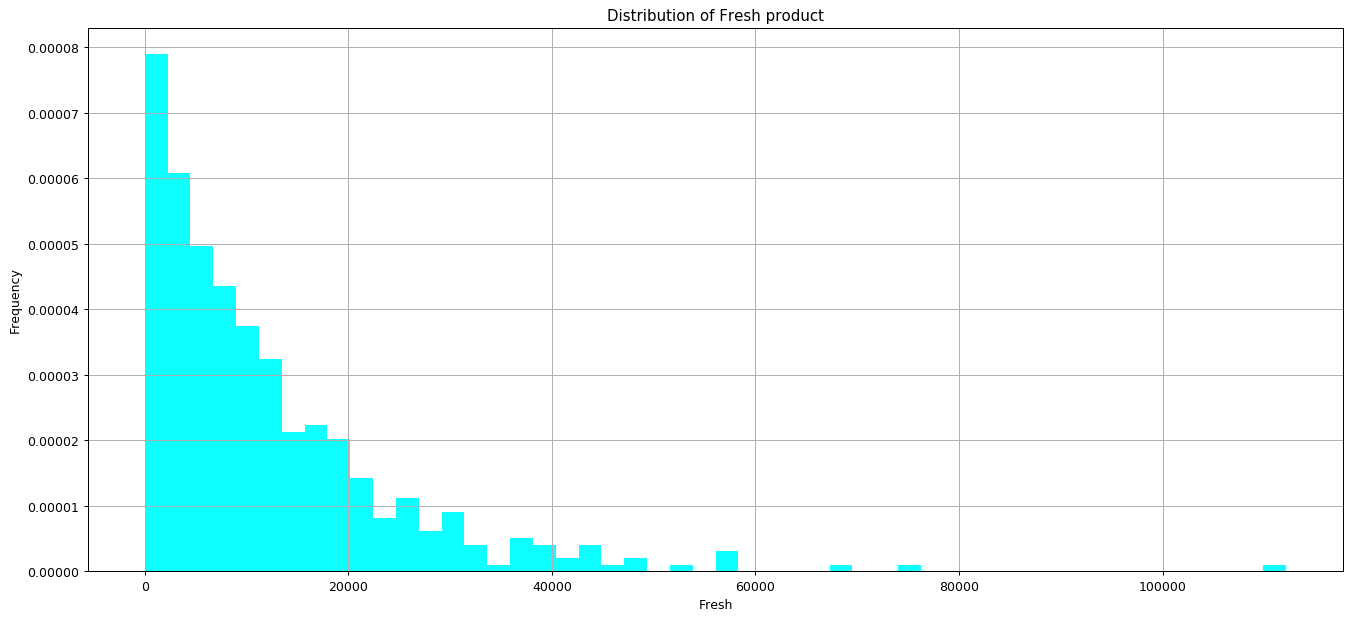

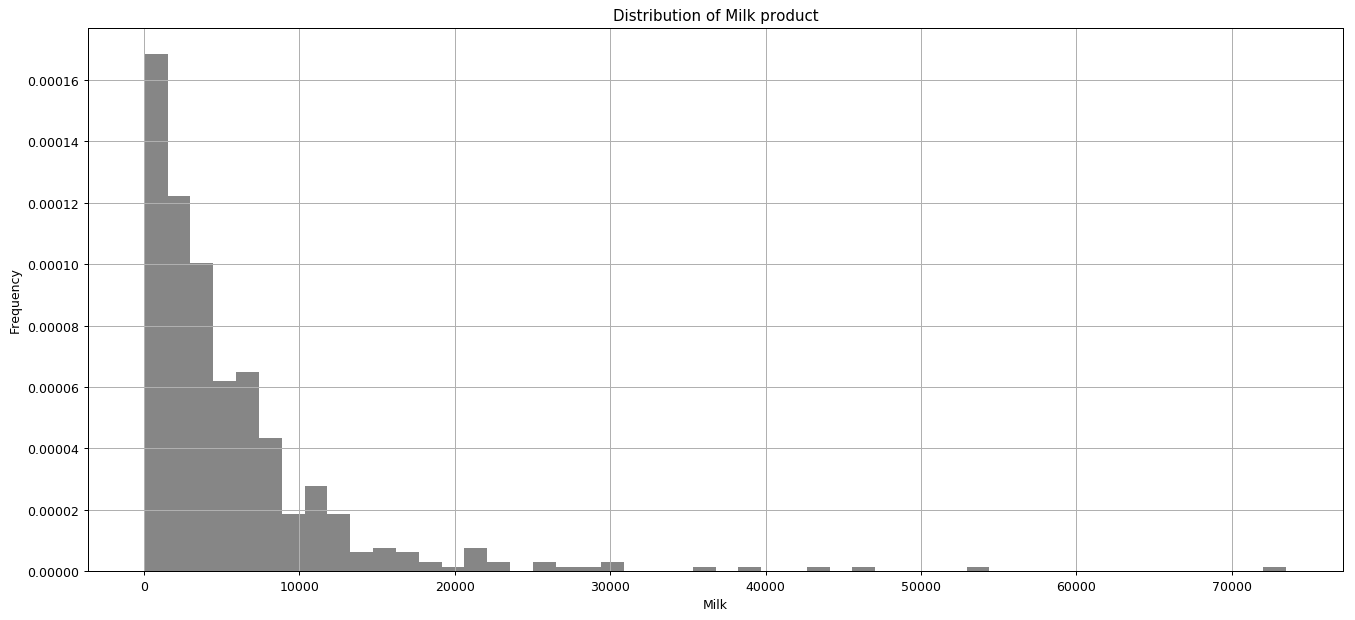

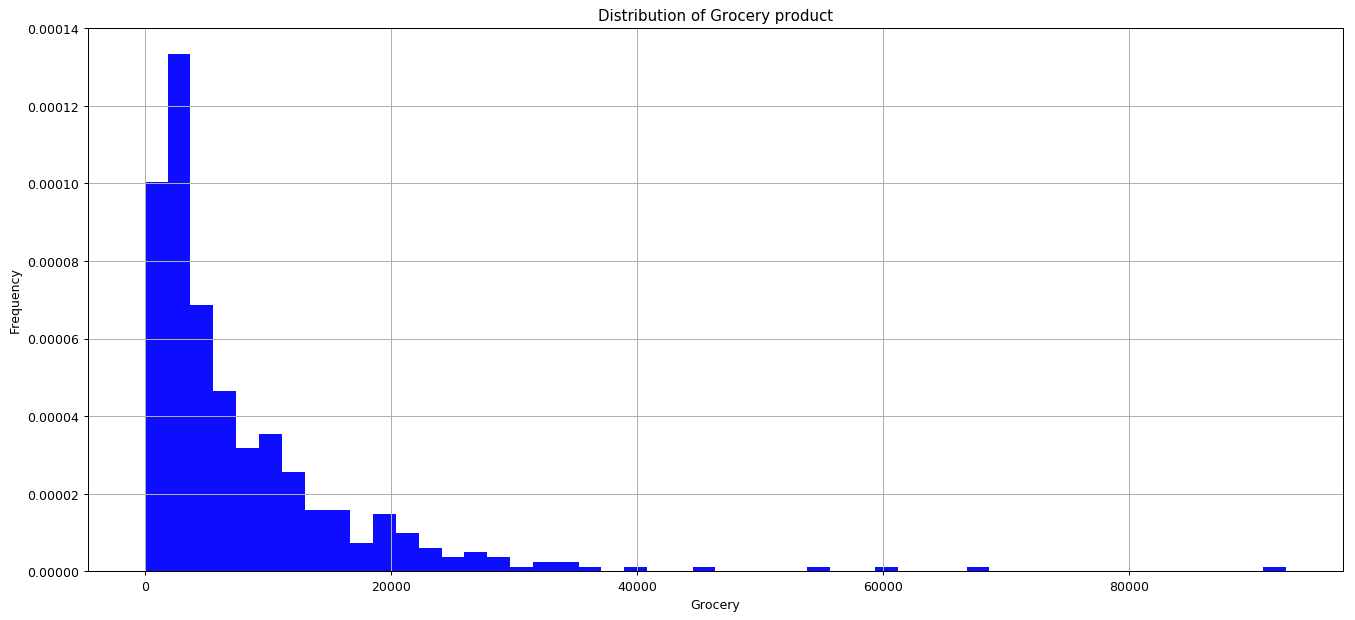

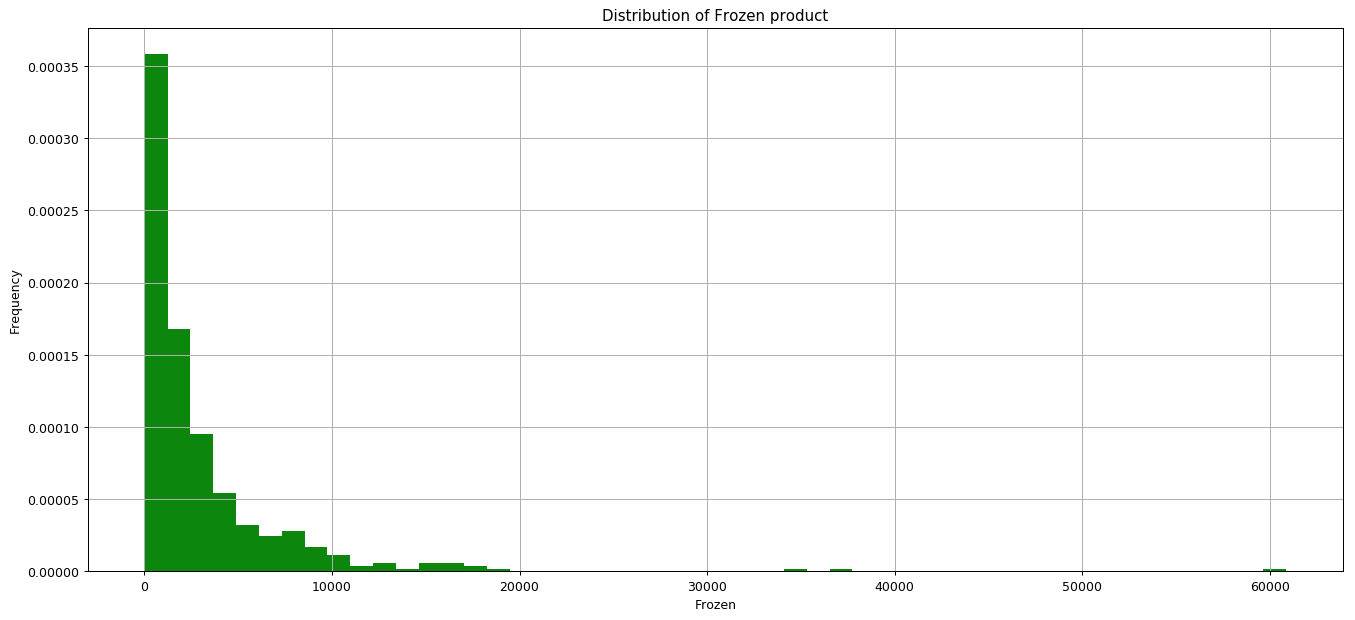

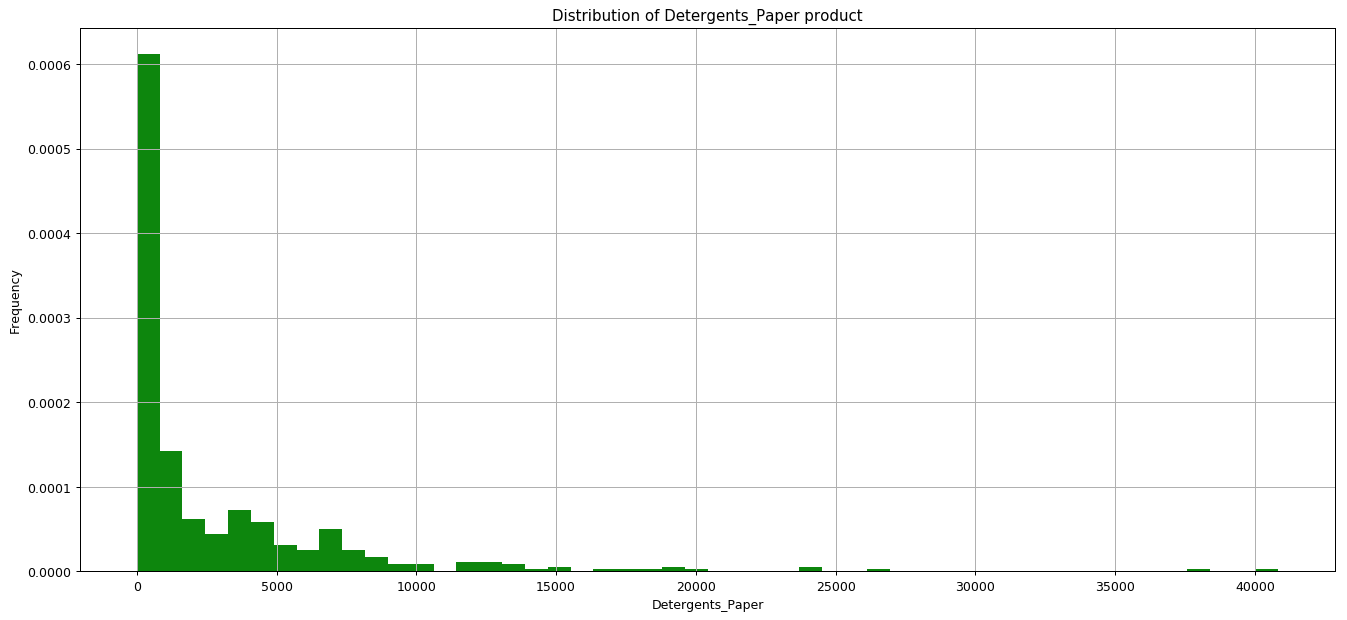

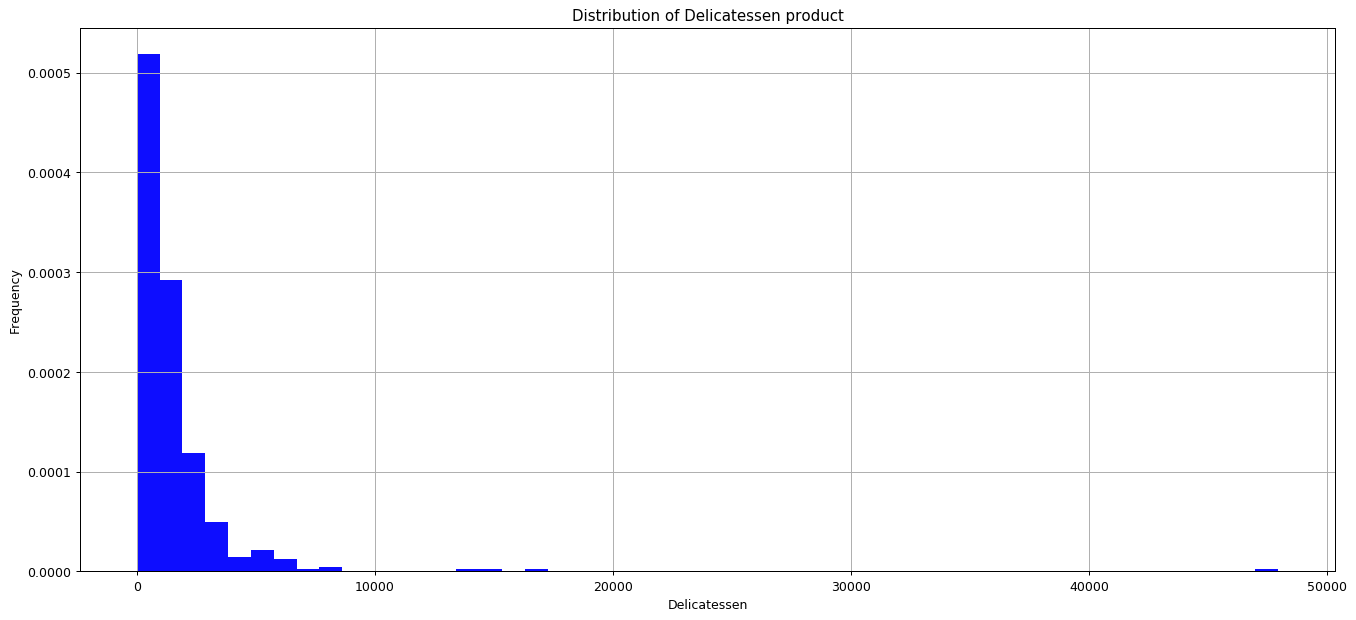

In [207]:
import matplotlib.pyplot as plt
import random

color_list = ['green', 'blue', 'purple', 'gray', 'magenta', 'cyan', 'orange', 'yellow', 'black']
for column_name in column_name_list:
    rand_color = color_list[random.randint(0,len(color_list)-3)]
    column_series = customer_product_df[column_name]
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(column_series.values, bins=50, density=1, facecolor=rand_color, alpha=0.95)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + column_name + ' product')
    plt.grid(True)
    plt.show()

## Calculate Q1, Q3 and mean value of each column

In [208]:
column_quantile_value = customer_product_df.quantile([0.25, 0.5, 0.75])
print(type(column_quantile_value))
print(column_quantile_value)

<class 'pandas.core.frame.DataFrame'>
         Fresh     Milk   Grocery   Frozen  Detergents_Paper  Delicatessen
0.25   3127.75  1533.00   2153.00   742.25            256.75        408.25
0.50   8504.00  3627.00   4755.50  1526.00            816.50        965.50
0.75  16933.75  7190.25  10655.75  3554.25           3922.00       1820.25


## Remove outlier by filter interval [Q1 - c * IQR, Q3 + c * IQR] where c is a parameter

Fresh


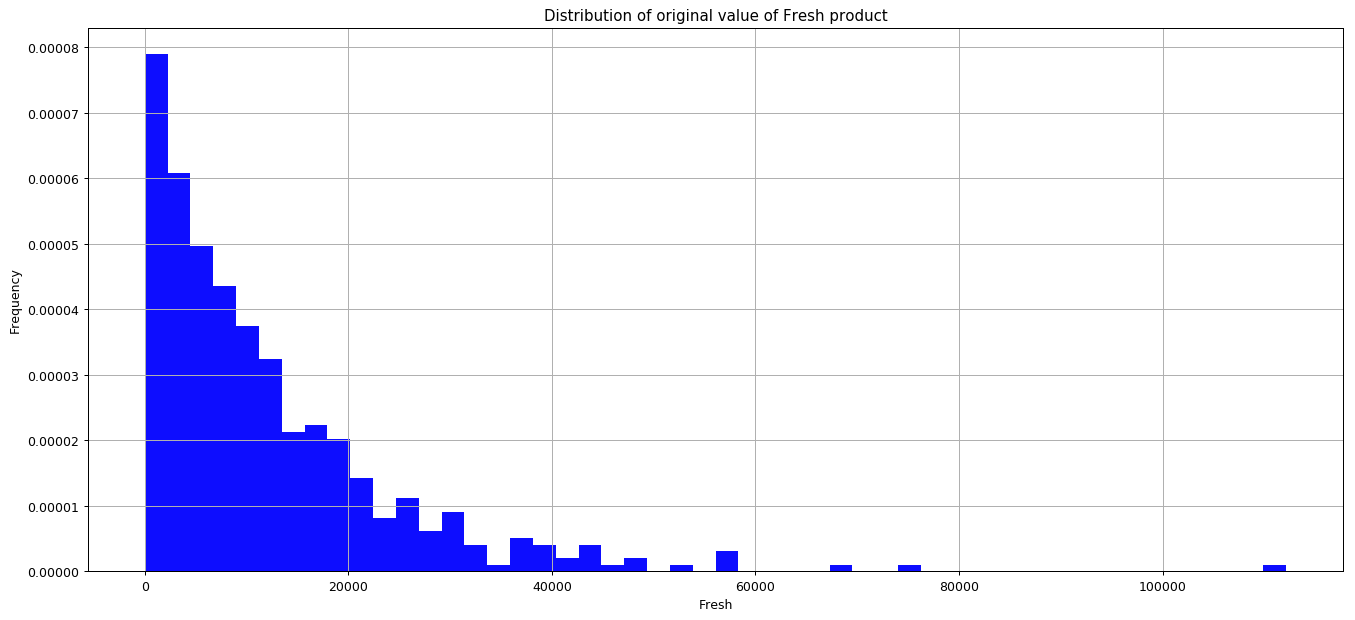

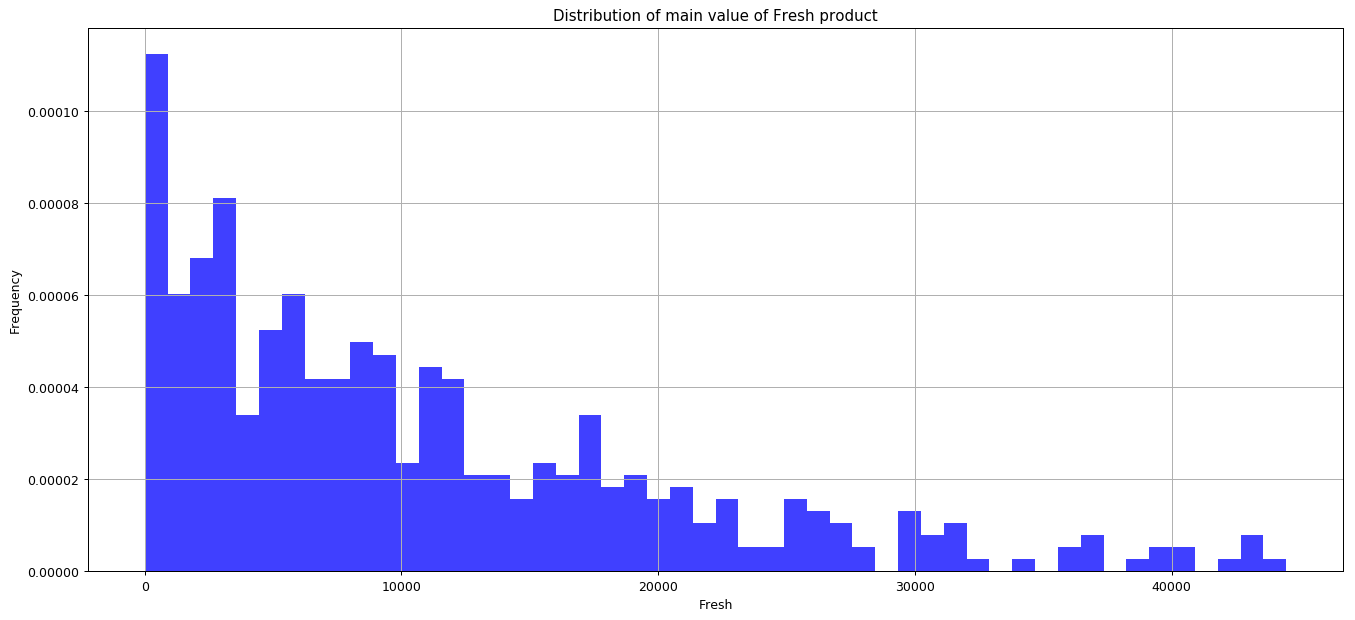

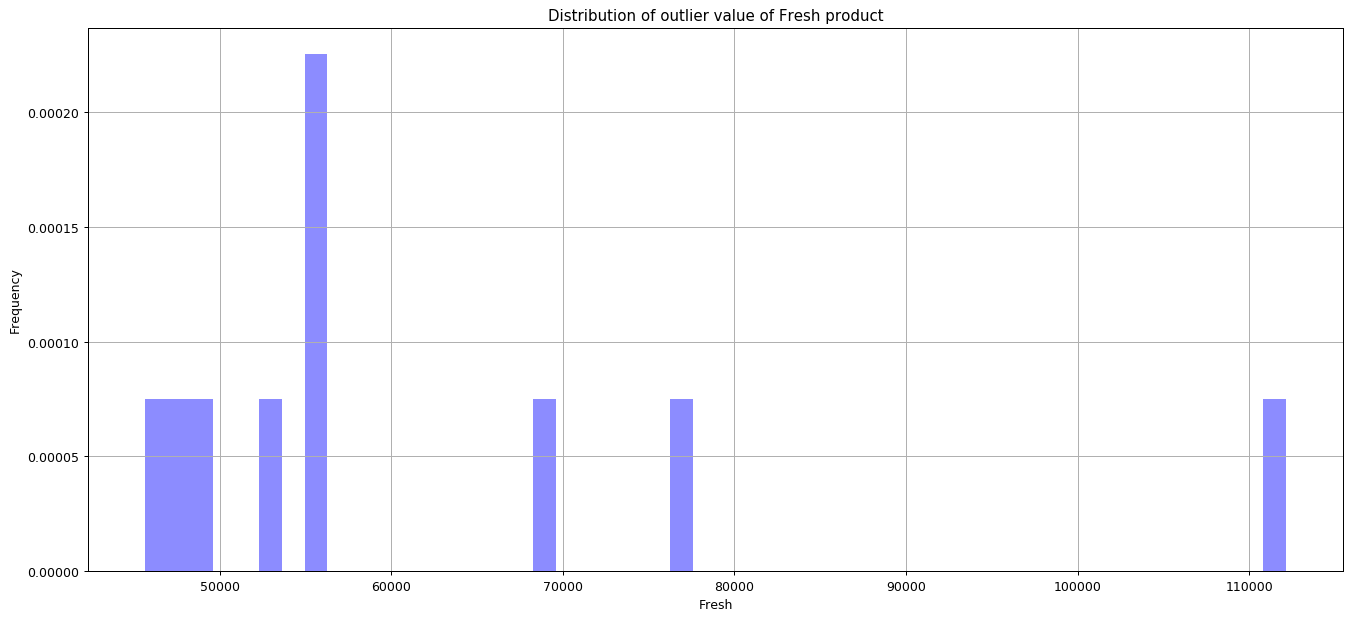

Milk


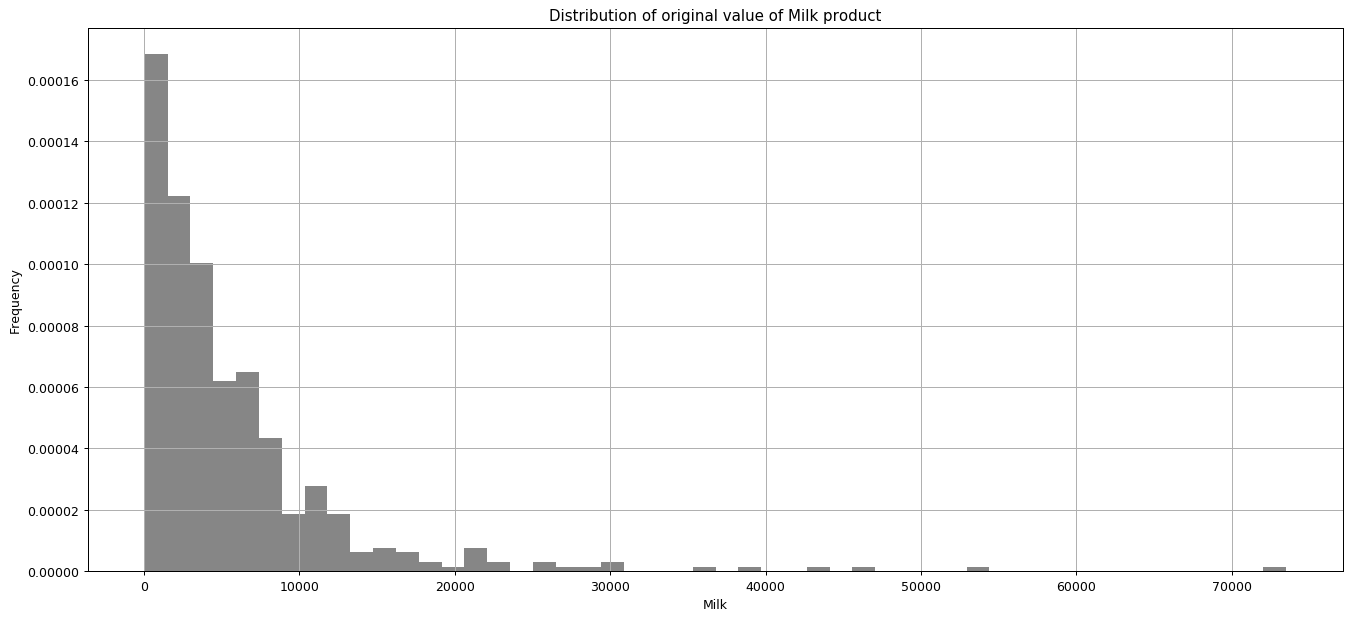

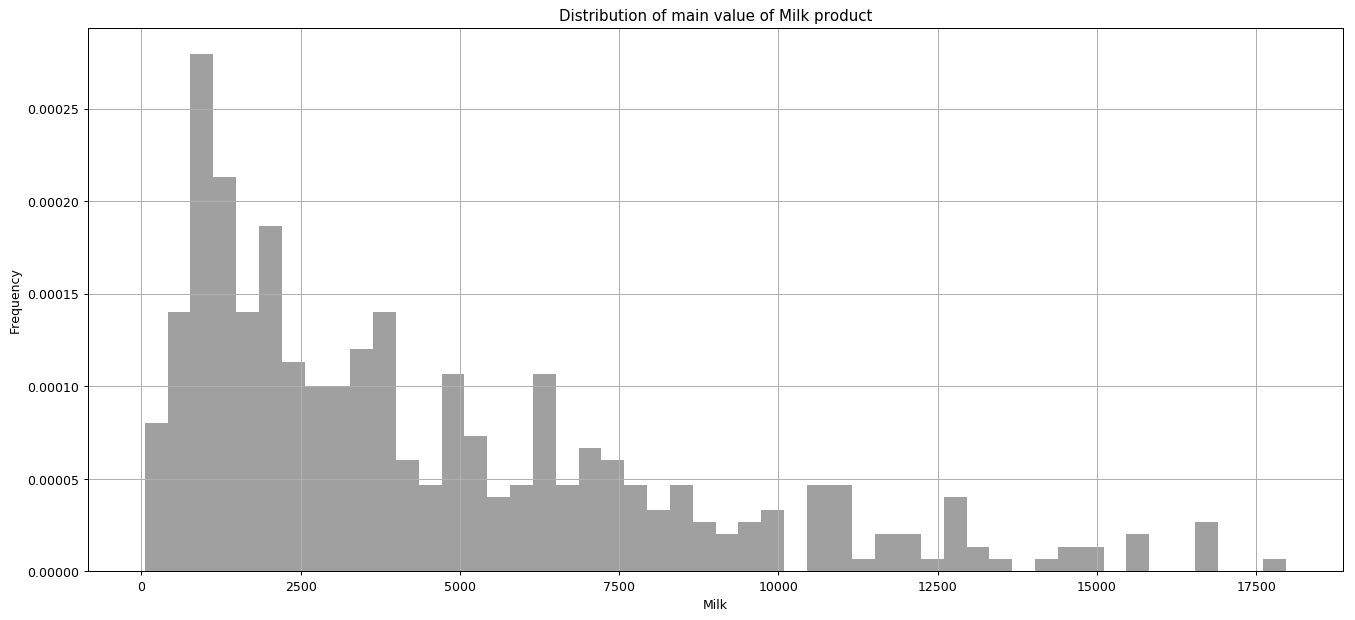

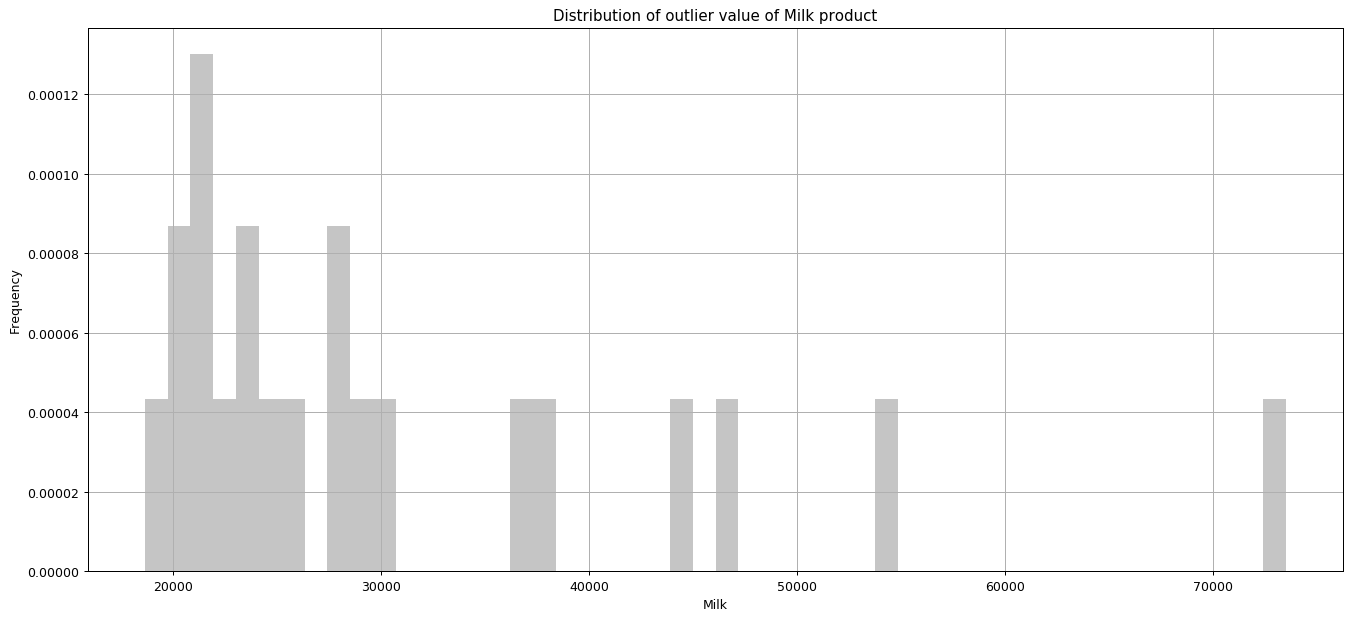

Grocery


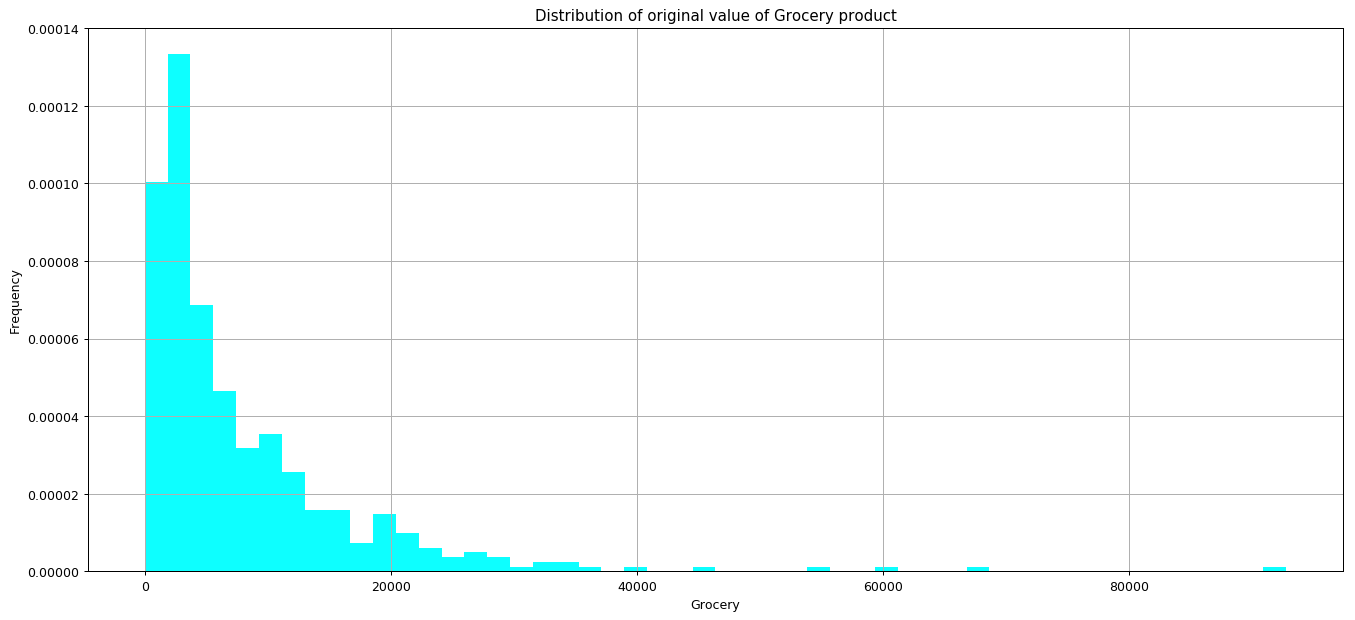

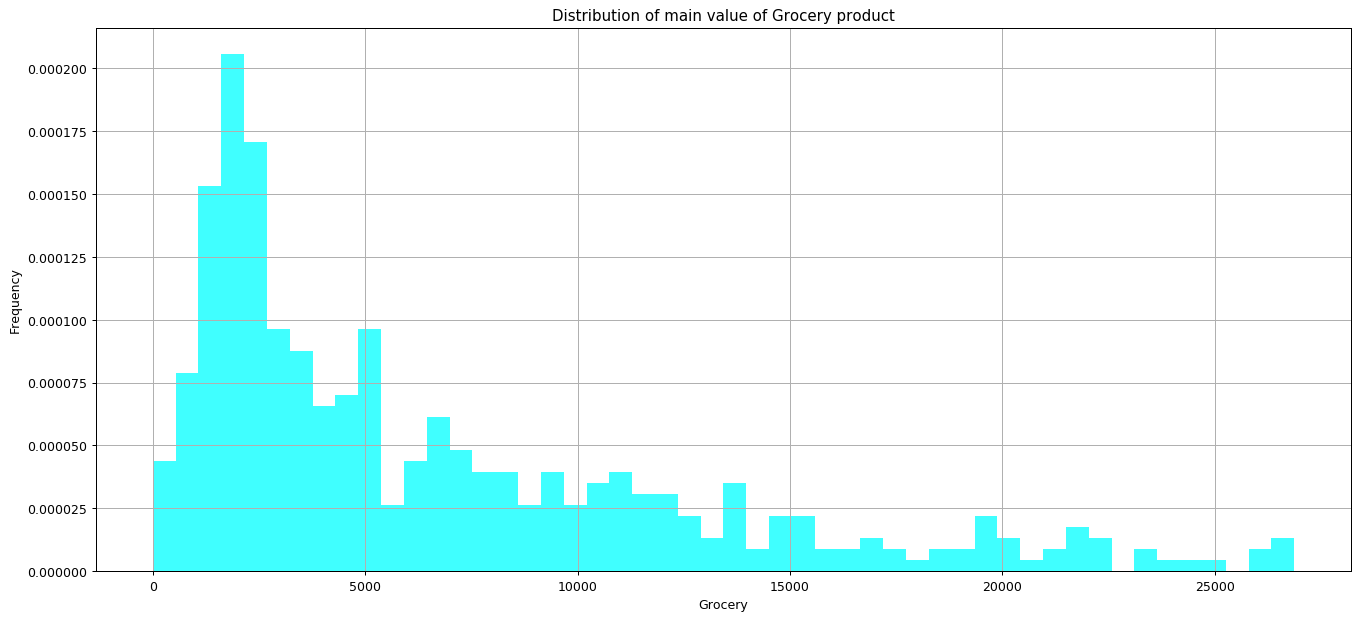

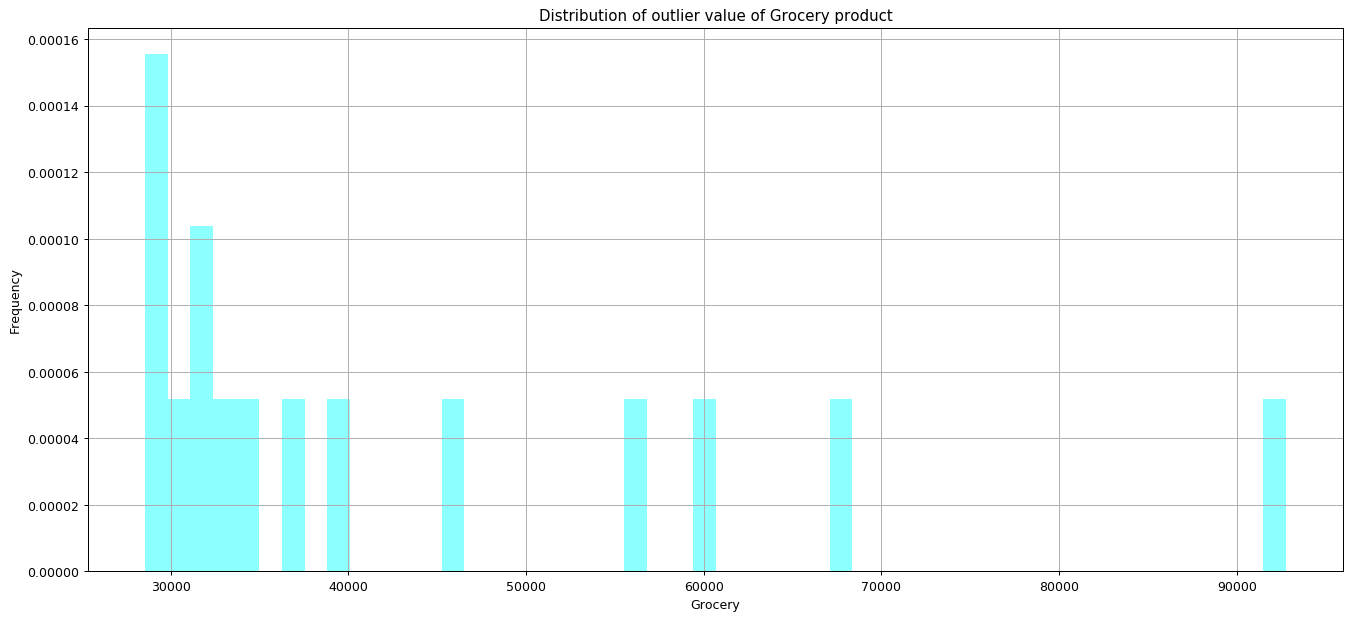

Frozen


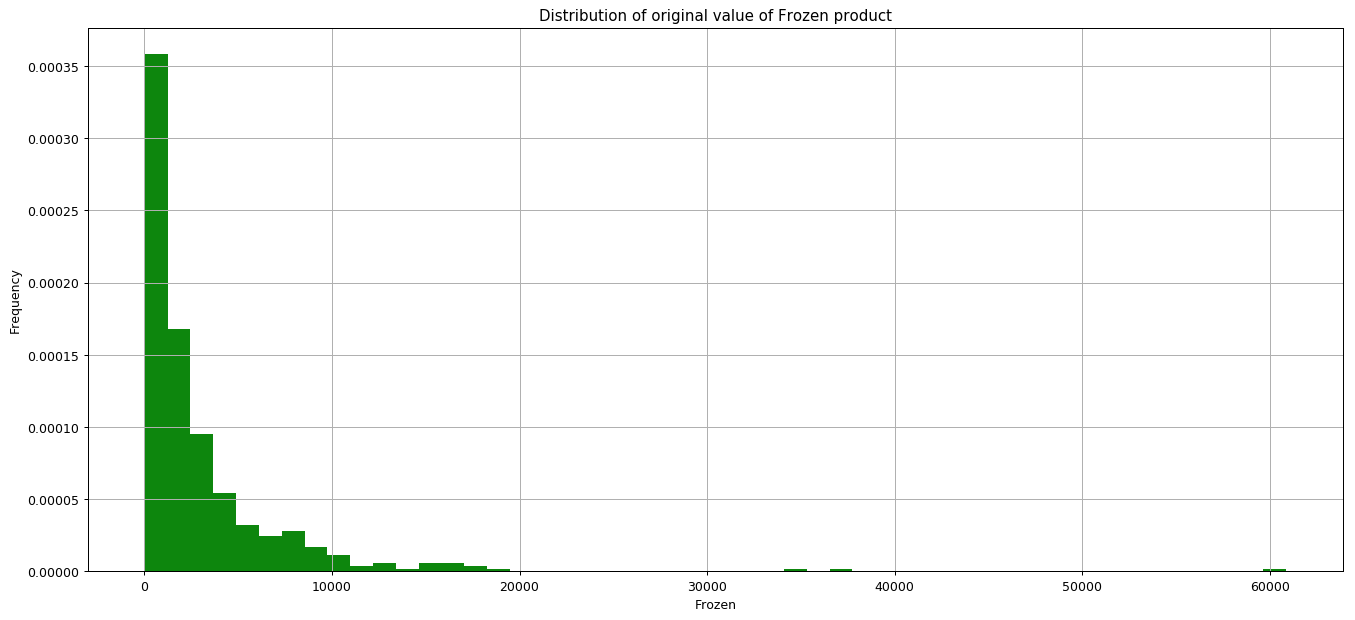

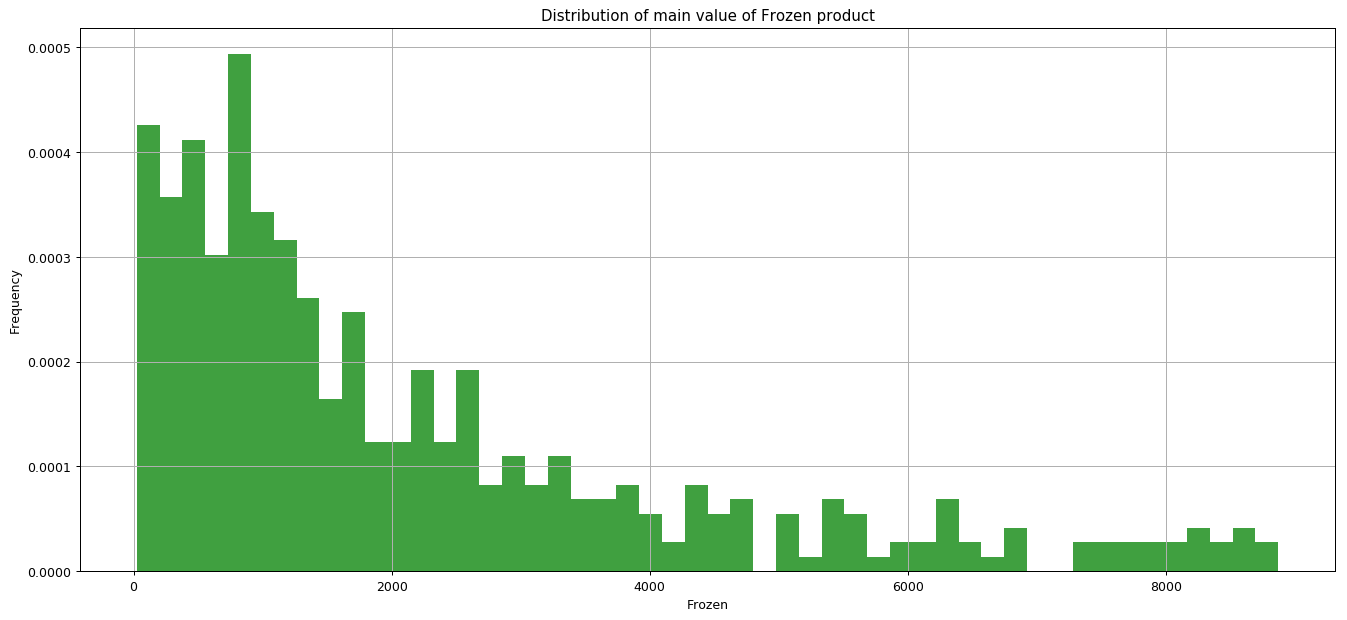

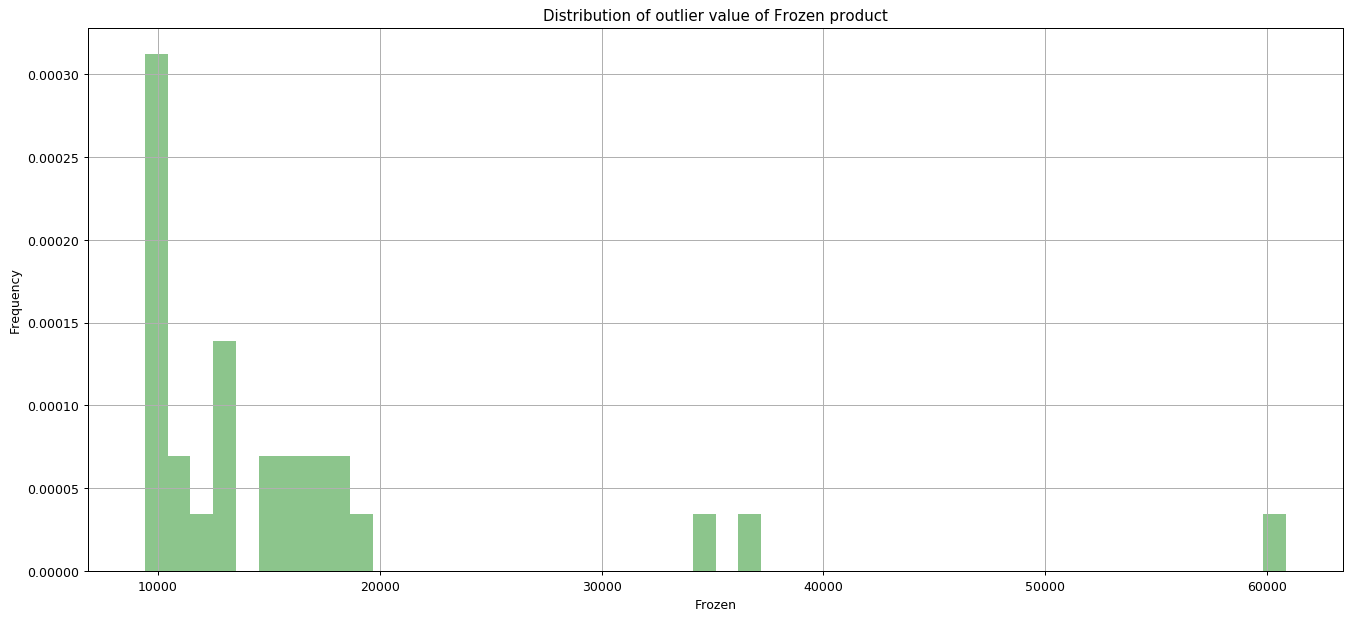

Detergents_Paper


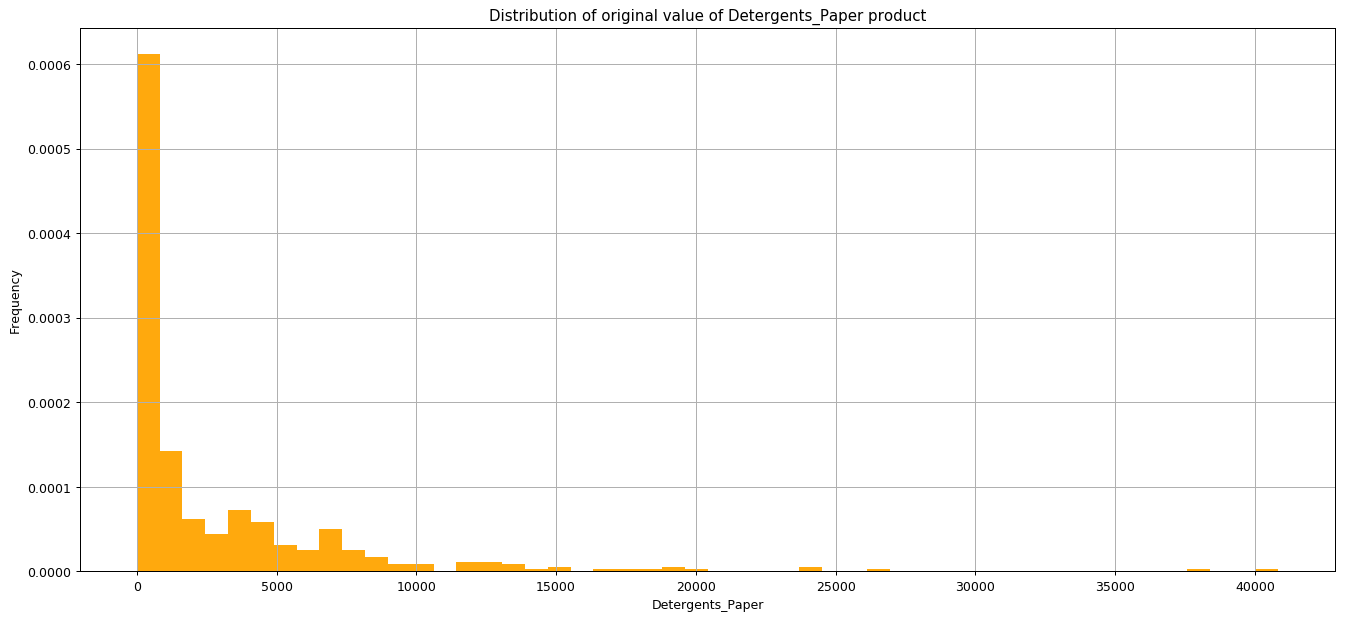

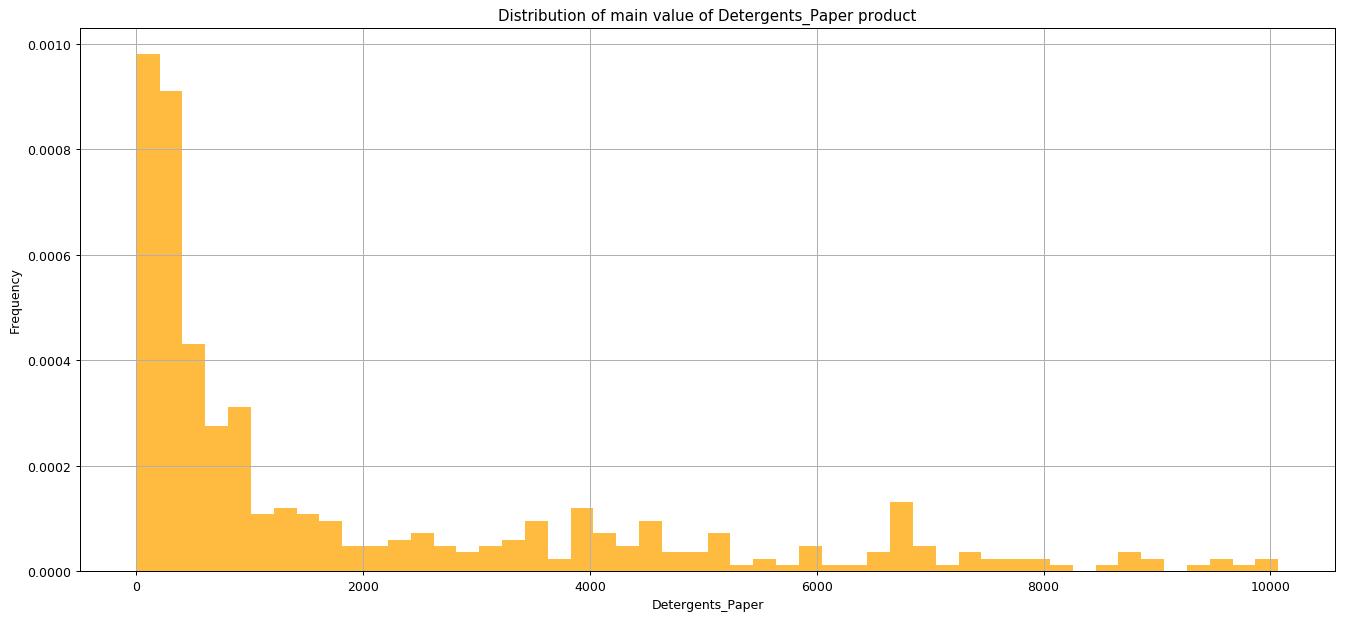

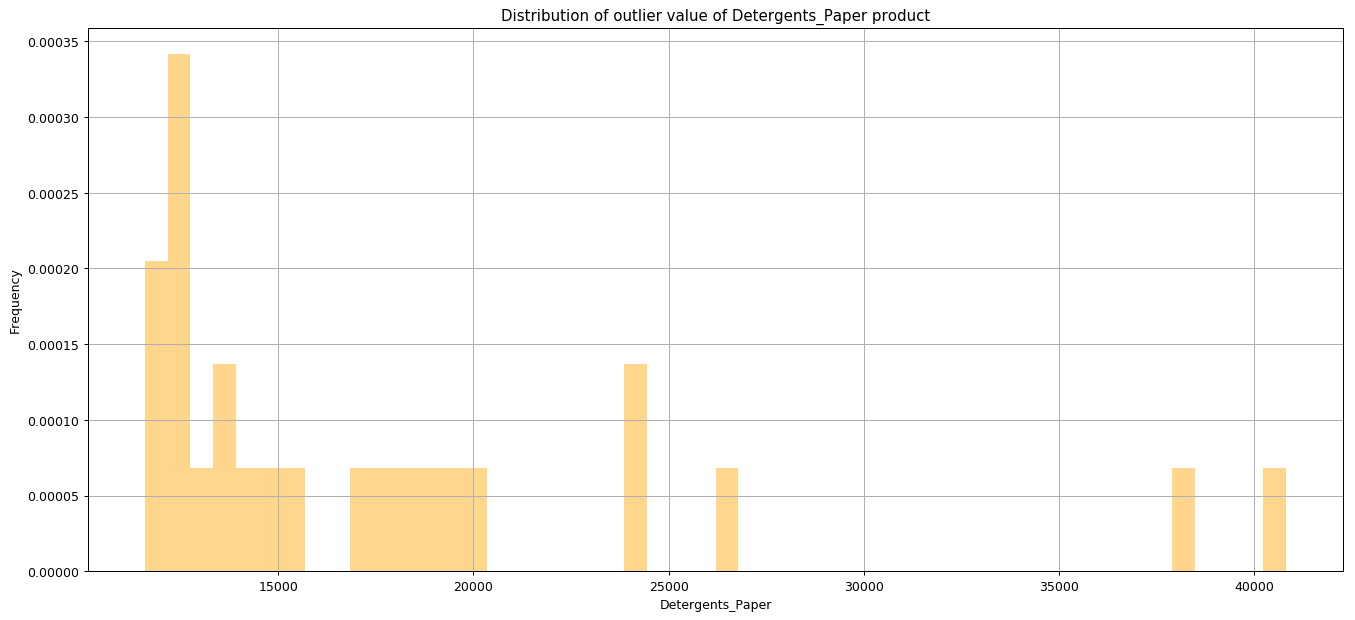

Delicatessen


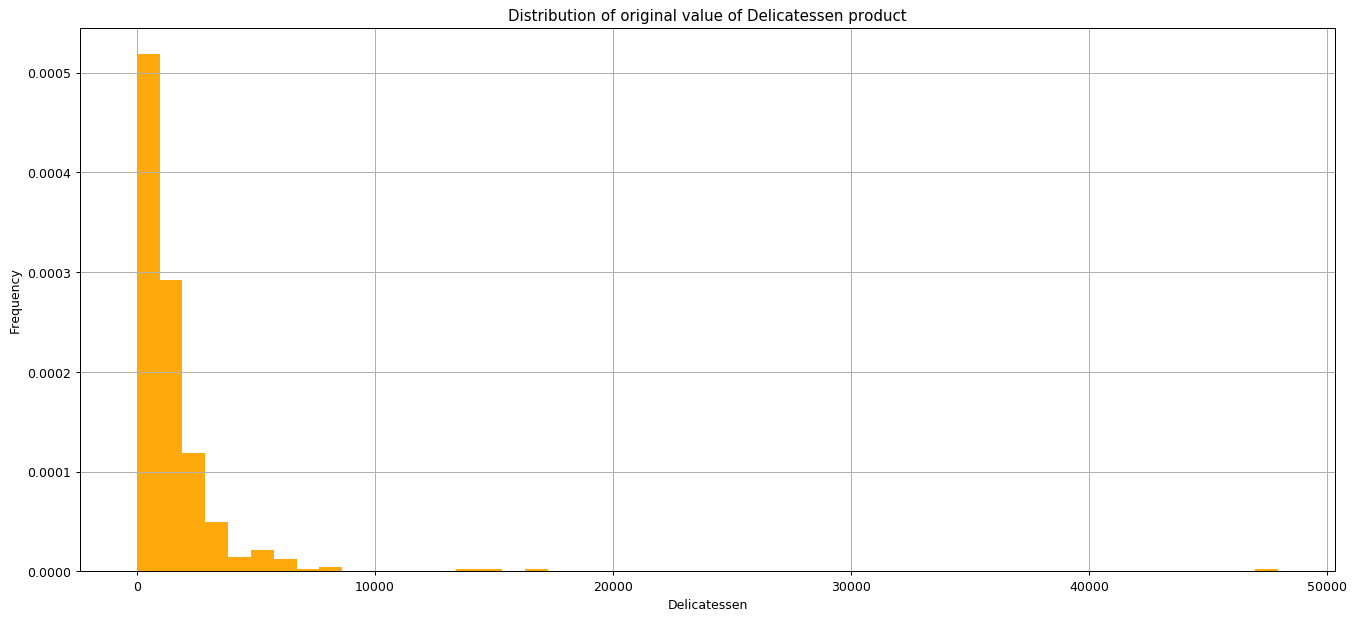

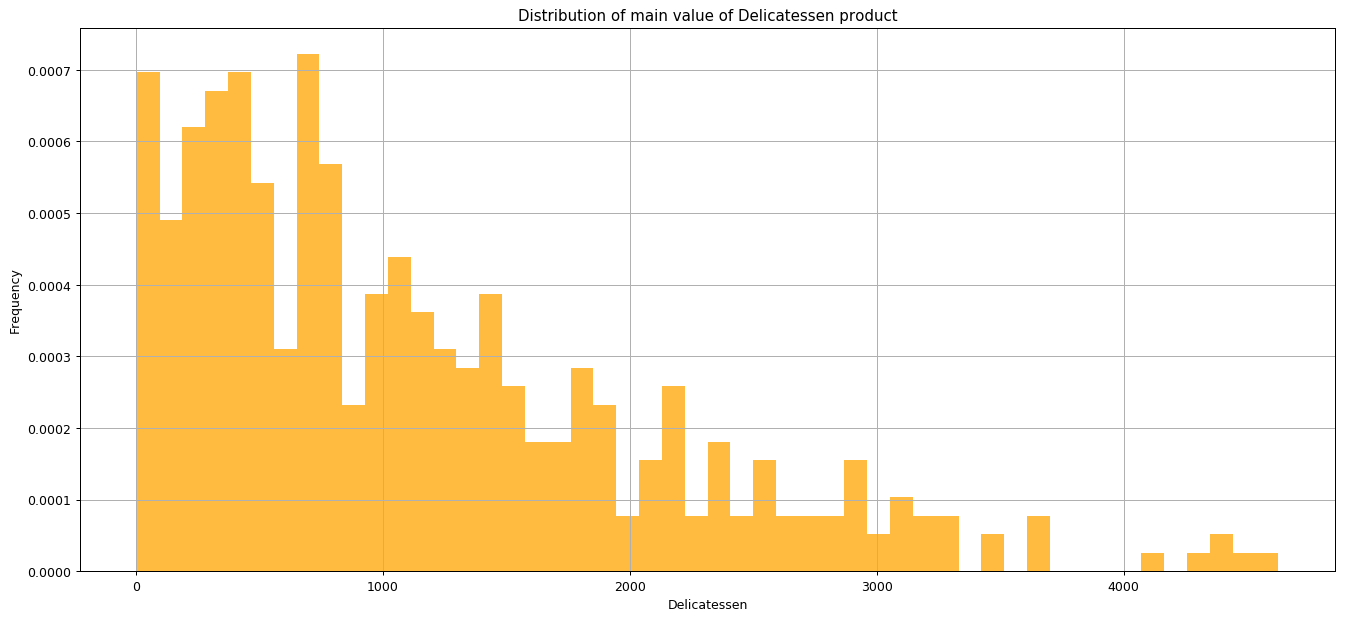

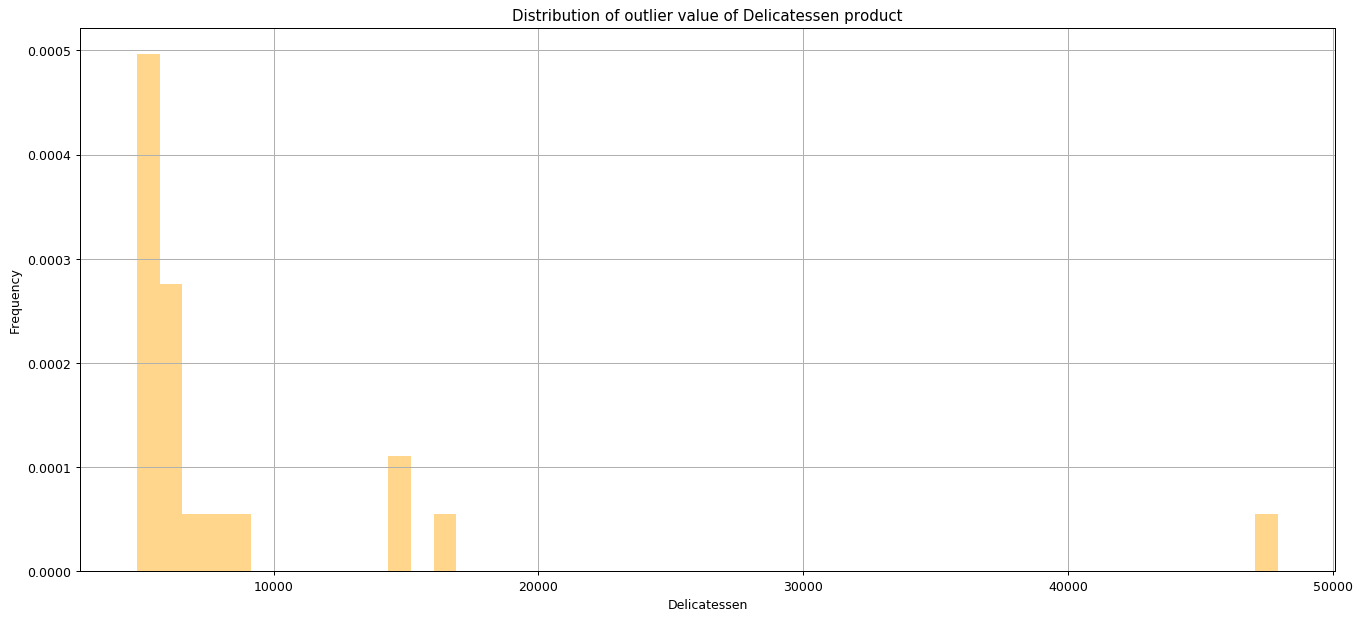

In [209]:
column_name = column_name_list[0]
b_outlier_lower_df = pd.DataFrame()
b_outlier_upper_df = pd.DataFrame()

for column_name in column_name_list:
    column_value = customer_product_df[column_name].values

    # get mean, Q1, Q3 and IQR value
    mean_column_value = column_quantile_value.loc[0.5][column_name]
    q1_column_value = column_quantile_value.loc[0.25][column_name]
    q3_column_value = column_quantile_value.loc[0.75][column_name]
    iqr_column_value = q3_column_value - q1_column_value

    # filter outlier by interval [Q1 - 2 IQR, Q3 + 2 IQR]

    filter_c = 2

    b_outlier_lower = column_value < q1_column_value - filter_c * iqr_column_value
    # print(b_outlier_lower)
    b_outlier_upper = column_value > q3_column_value + filter_c * iqr_column_value
    # print(b_outlier_upper)
    outlier_column_value = column_value[b_outlier_lower | b_outlier_upper]
    # print(outlier_column_value)
    main_column_value = column_value[(~b_outlier_lower) & (~b_outlier_upper)]
    # print(main_column_value)
    
    # append to b_outlier series
    b_outlier_lower_df[column_name] = pd.Series(b_outlier_lower)
    b_outlier_upper_df[column_name] = pd.Series(b_outlier_upper)

    print(column_name)
    # draw histogram of original data
    rand_color = color_list[random.randint(0,len(color_list)-3)]
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(column_value, bins=50, density=1, facecolor=rand_color, alpha=0.95)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of original value of ' + column_name + ' product')
    plt.grid(True)
    plt.show()
    
    # draw histogram of main value data
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(main_column_value, bins=50, density=1, facecolor=rand_color, alpha=0.75)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of main value of ' + column_name + ' product')
    plt.grid(True)
    plt.show()

    # draw histogram of outlier value data
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(outlier_column_value, bins=50, density=1, facecolor=rand_color, alpha=0.45)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of outlier value of ' + column_name + ' product')
    plt.grid(True)
    plt.show()

In [210]:
print(b_outlier_lower_df.describe())

        Fresh   Milk Grocery Frozen Detergents_Paper Delicatessen
count     440    440     440    440              440          440
unique      1      1       1      1                1            1
top     False  False   False  False            False        False
freq      440    440     440    440              440          440


In [211]:
print(b_outlier_upper_df.describe())

        Fresh   Milk Grocery Frozen Detergents_Paper Delicatessen
count     440    440     440    440              440          440
unique      2      2       2      2                2            2
top     False  False   False  False            False        False
freq      430    419     425    412              415          419


All the outlier items are on the right side or upper side, there is no outlier on the lower side
### However, we can see that outlier detection is not good enough, the width interval of outlier are is too large <br/>
How to improve outlier detection?

Fresh
[ 56159  56082  76237  45640 112151  47493  56083  53205  49063  68951]


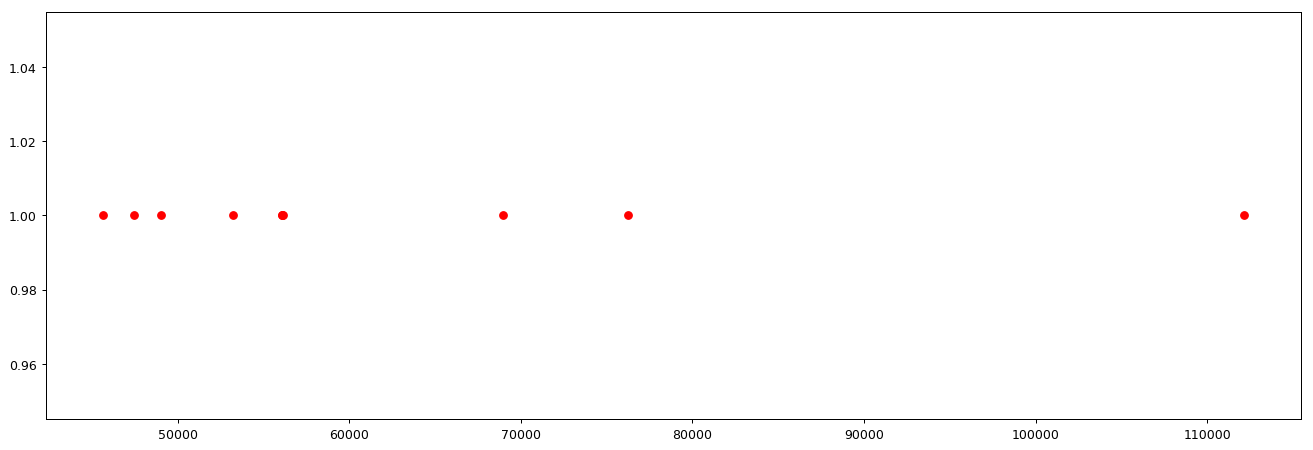

Milk
[36423 20484 22044 54259 21412 29892 38369 20959 46197 73498 27472 25862
 29627 43950 28326 23133 23527 20655 25071 18664 21858]


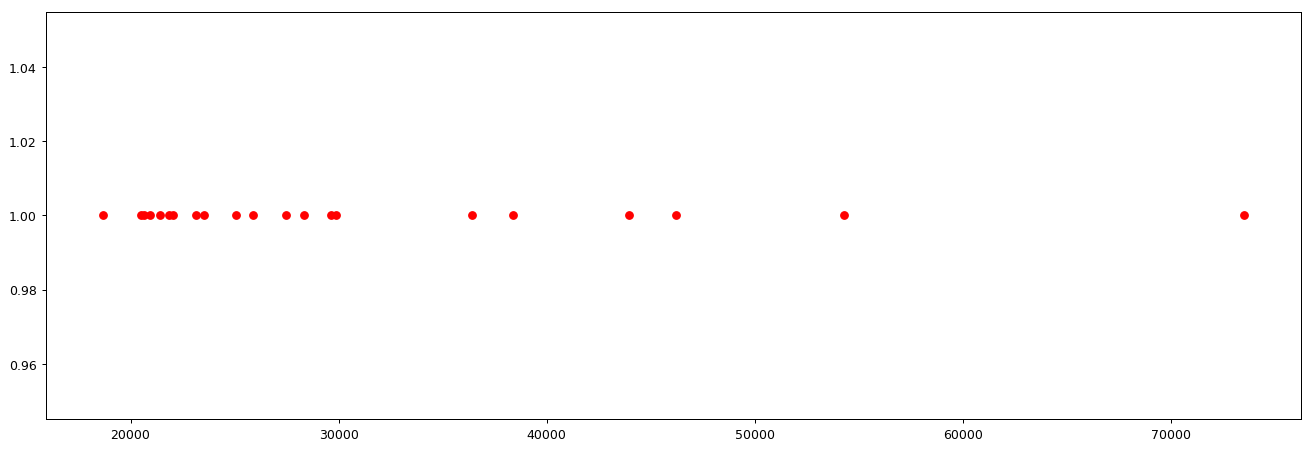

Grocery
[55571 28921 59598 45828 28540 92780 32114 32034 28986 34792 39694 36486
 33586 67298 30243]


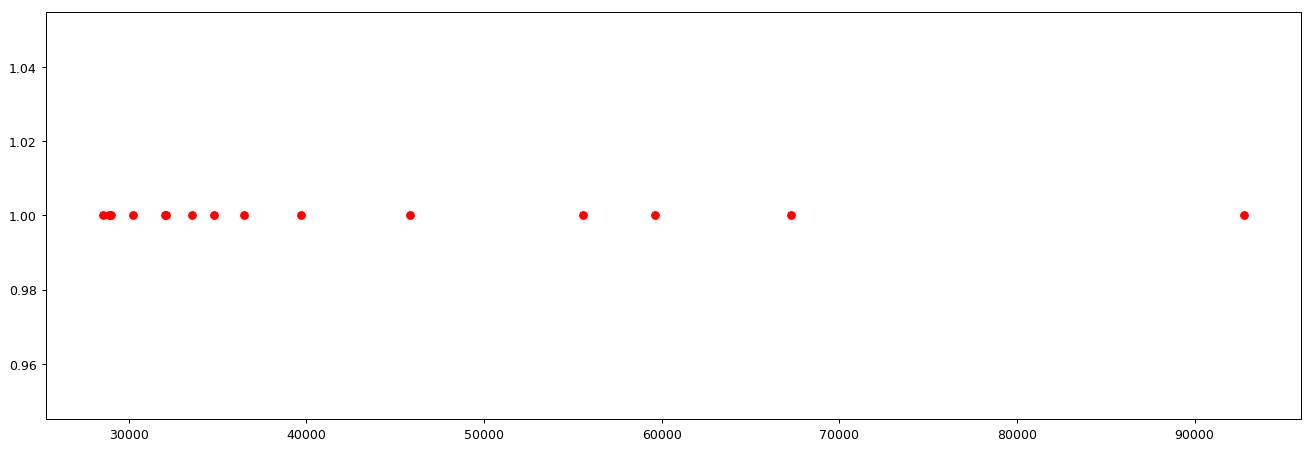

Frozen
[ 9408 10002  9510 10643  9735 35009 18028 16538 16745 36534 18711 11422
 10155 16919 10303 12569 60869 11559 15601  9584  9927 13223  9806 17866
 15348 15082 13486 13135]


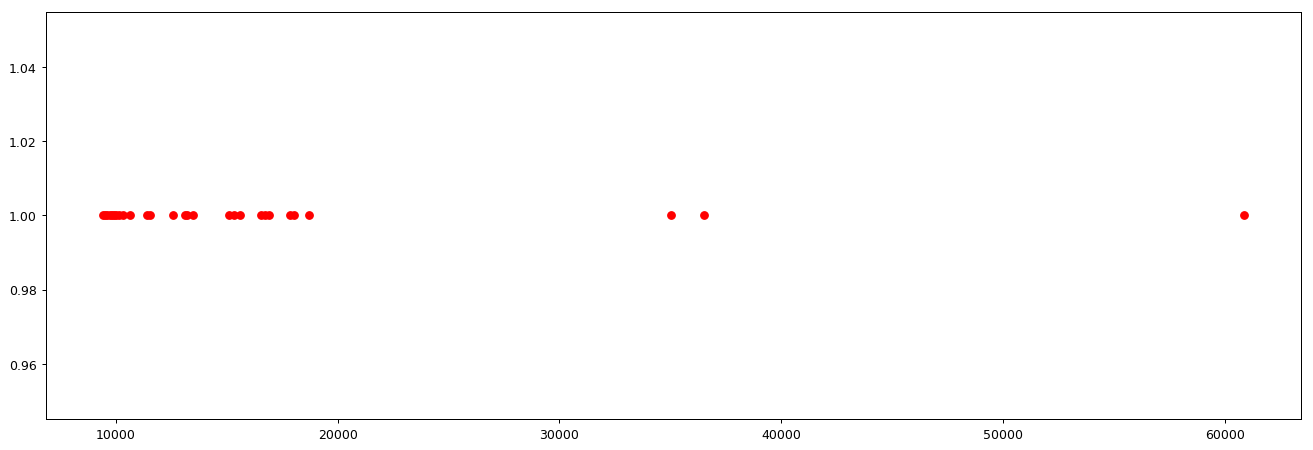

Detergents_Paper
[24171 13583 17740 26701 24231 12034 40827 20070 18906 12591 11577 13726
 14235 12420 19410 13308 18594 11783 17120 12408 38102 15469 12218 12638
 14841]


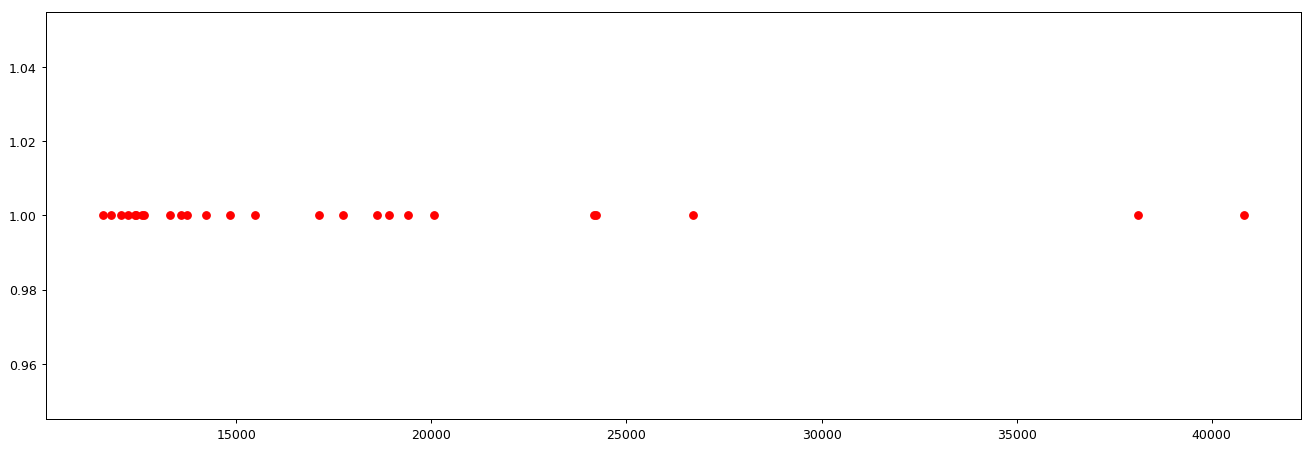

Delicatessen
[ 7844  5185 16523  5778  5206  5864  4985  6465 14472 14351  5130  6250
  8550 47943  6854  6372  5121  5609  4829  5120  5137]


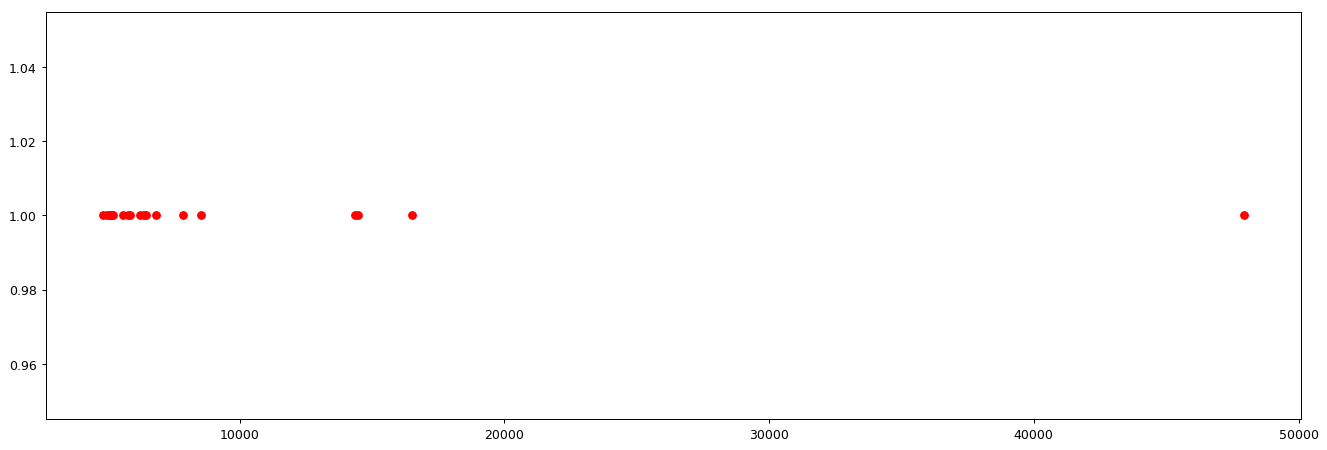

In [212]:
for column_name in column_name_list:
    # filter outlier upper
    column_value = customer_product_df[column_name].values
    outlier_column_value = column_value[b_outlier_upper_df[column_name].values]
    print(column_name)
    print(outlier_column_value)
    fig=plt.figure(figsize=(18, 6), dpi= 90, facecolor='w', edgecolor='k')
    fig.add_subplot(111)
    plt.plot(outlier_column_value,np.ones(len(outlier_column_value)), 'ro')
    plt.show()

### Run K-mean clustering on outlier items <br/>
- Divide into 3 clusters
- Only one cluster which has the biggest centroid value is considered as outlier

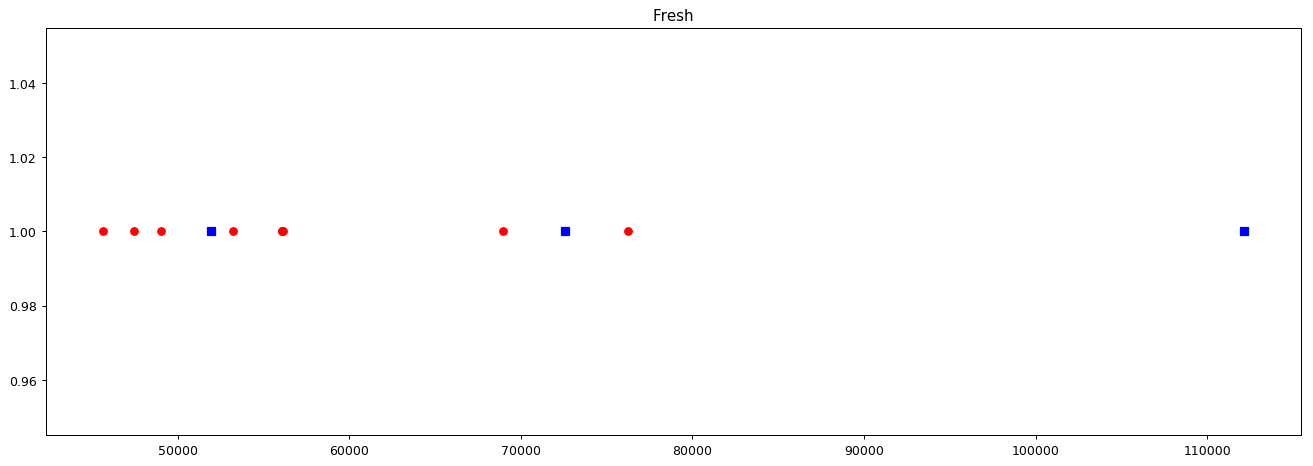

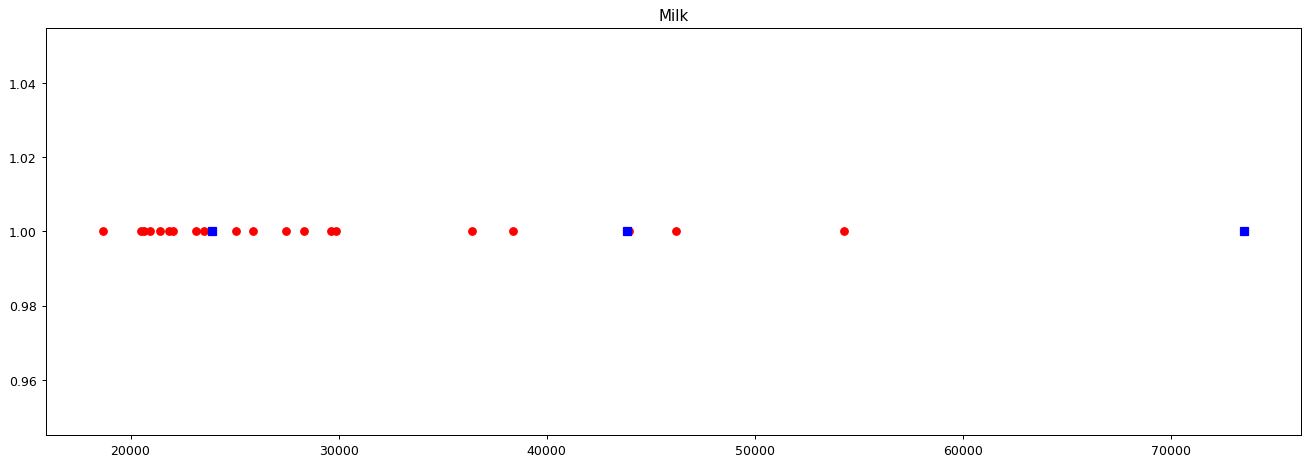

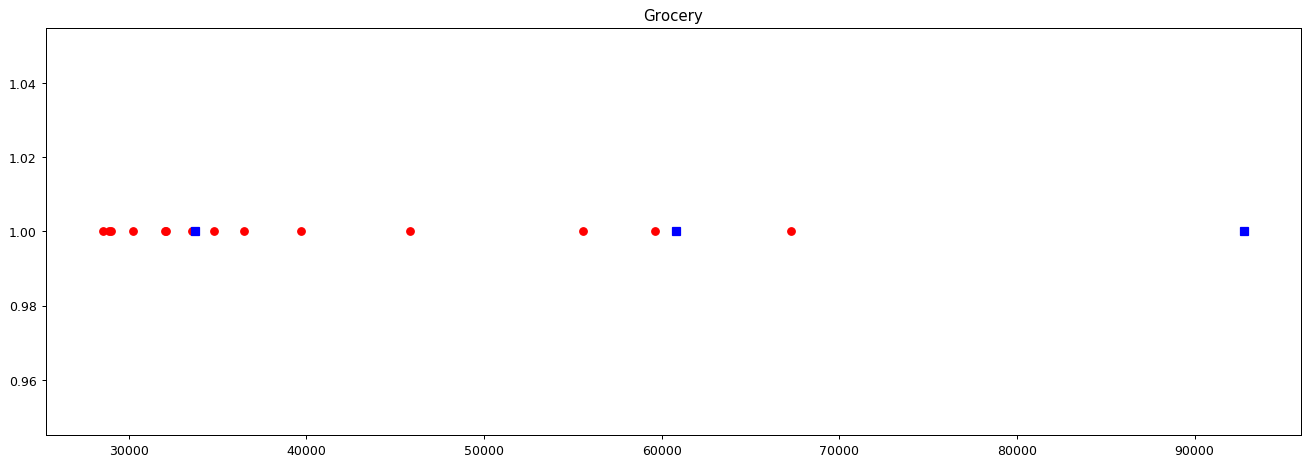

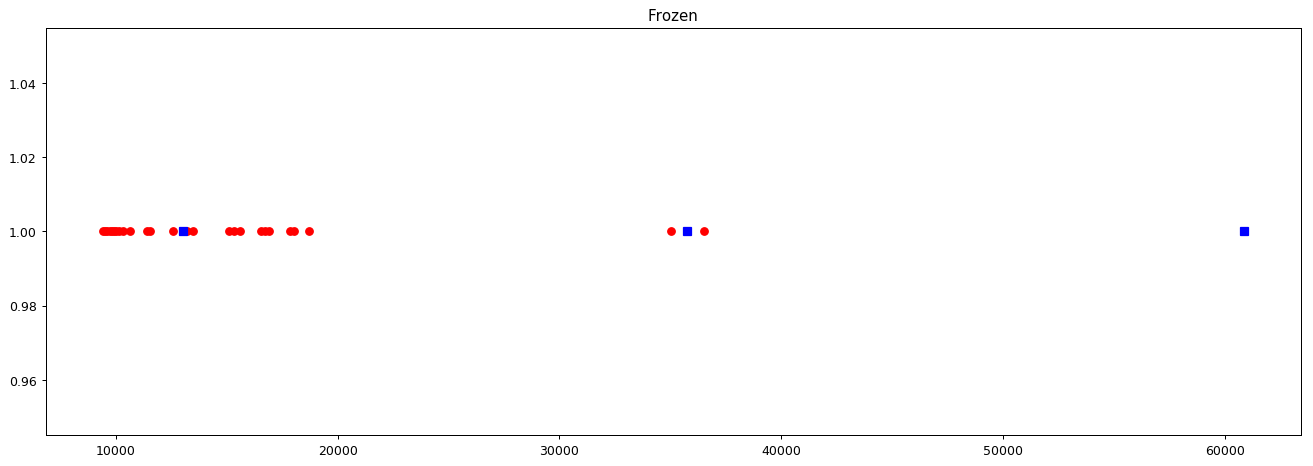

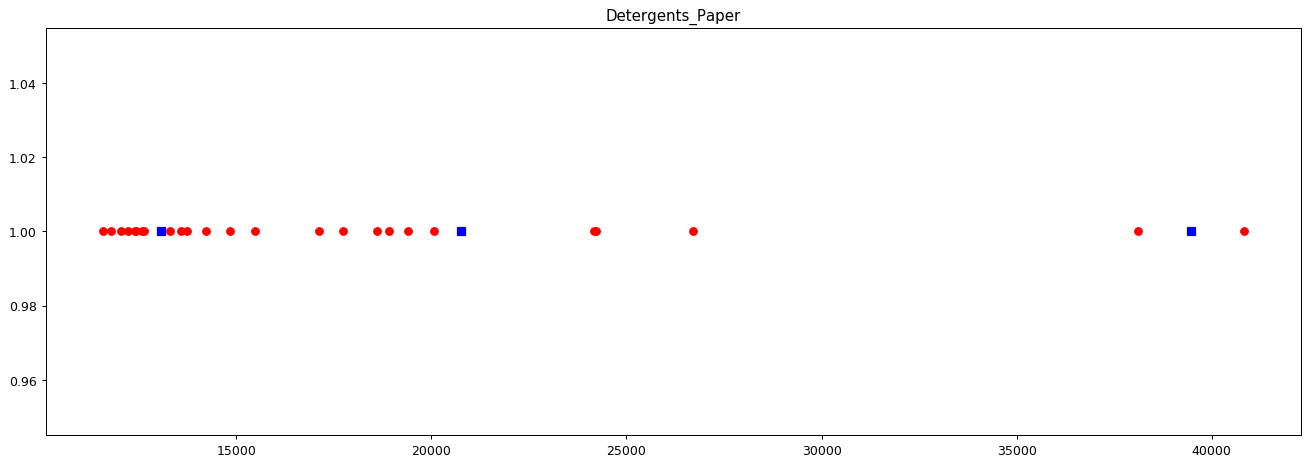

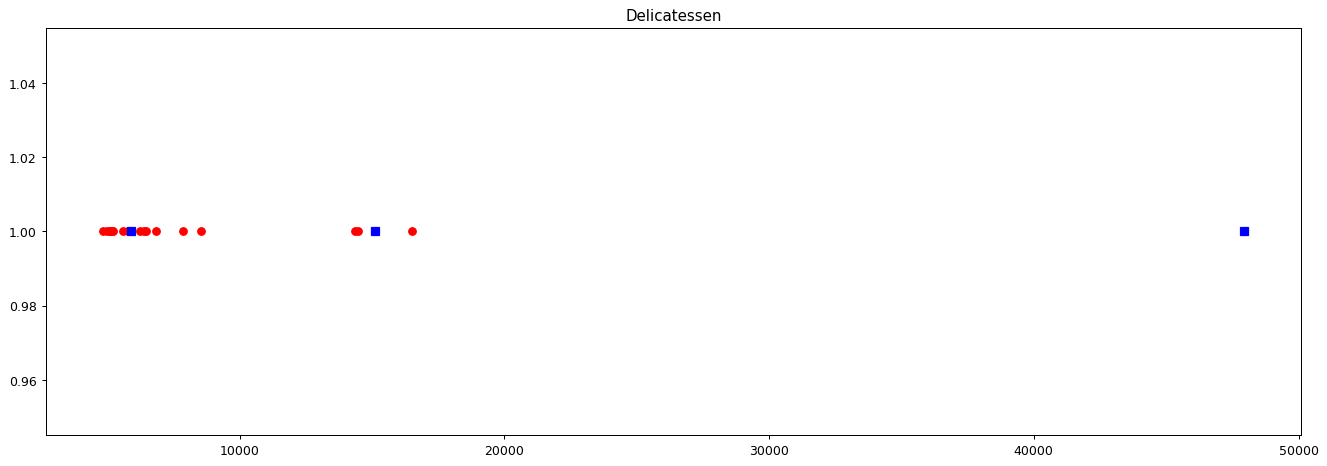

In [213]:
from sklearn.cluster import KMeans

for column_name in column_name_list:
    # filter outlier upper
    column_value = customer_product_df[column_name].values
    outlier_column_value = column_value[b_outlier_upper_df[column_name].values]
    # print(column_name)
    # print(outlier_column_value)
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(outlier_column_value.reshape(-1,1))
    column_outlier_cluster_center = kmeans.cluster_centers_
    column_outlier_cluster_label = kmeans.labels_
    # print(column_outlier_cluster_center)
    # print(column_outlier_cluster_label)
    fig=plt.figure(figsize=(18, 6), dpi= 90, facecolor='w', edgecolor='k')
    fig.add_subplot(111)
    plt.plot(outlier_column_value,np.ones(len(outlier_column_value)), 'ro')
    plt.plot(column_outlier_cluster_center,np.ones(len(column_outlier_cluster_center)), 'bs')
    plt.title(column_name)
    plt.show()

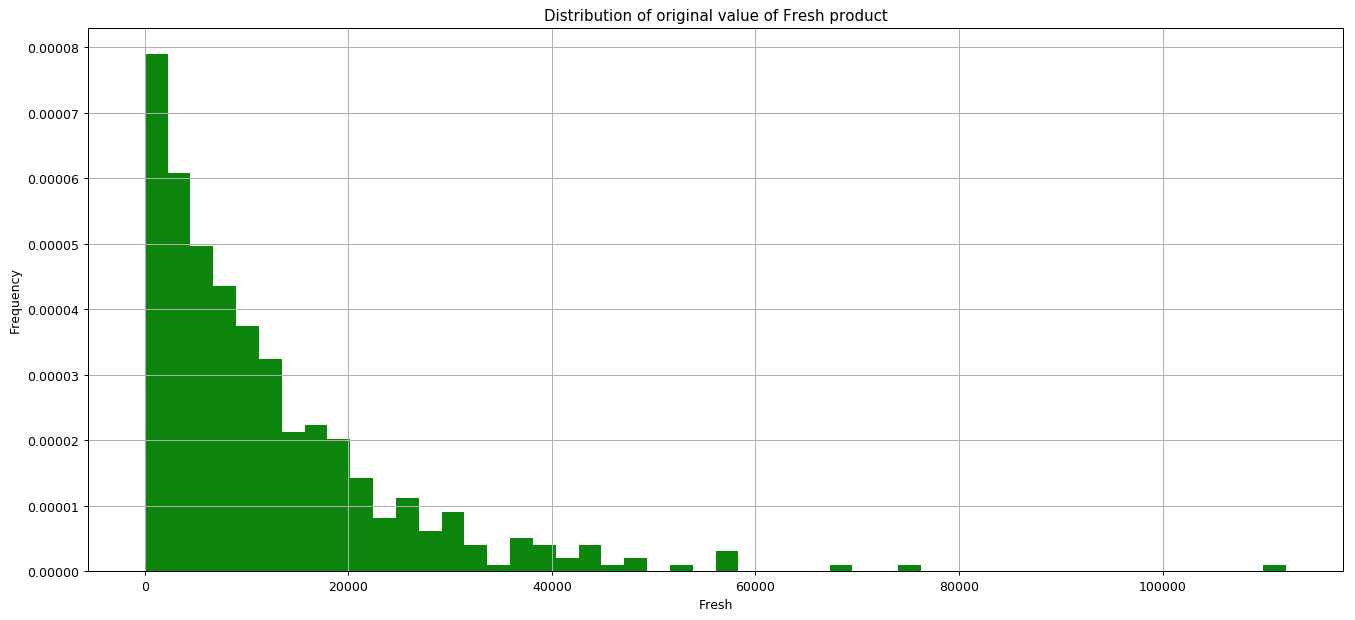

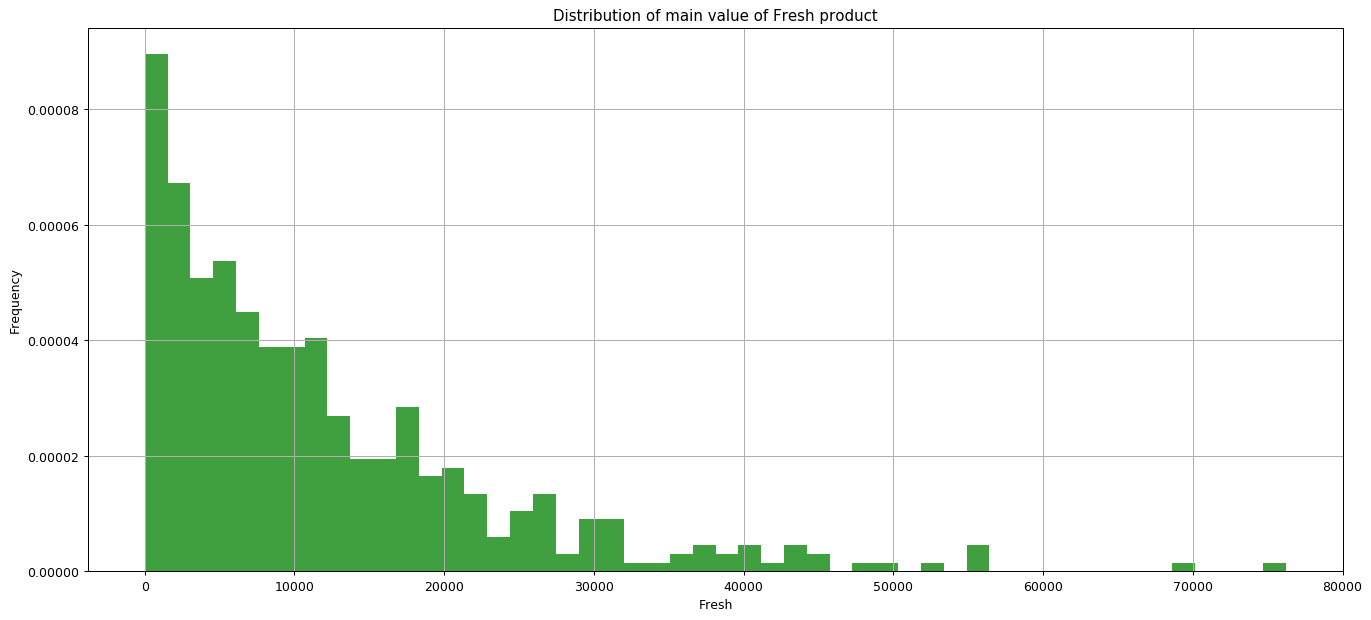

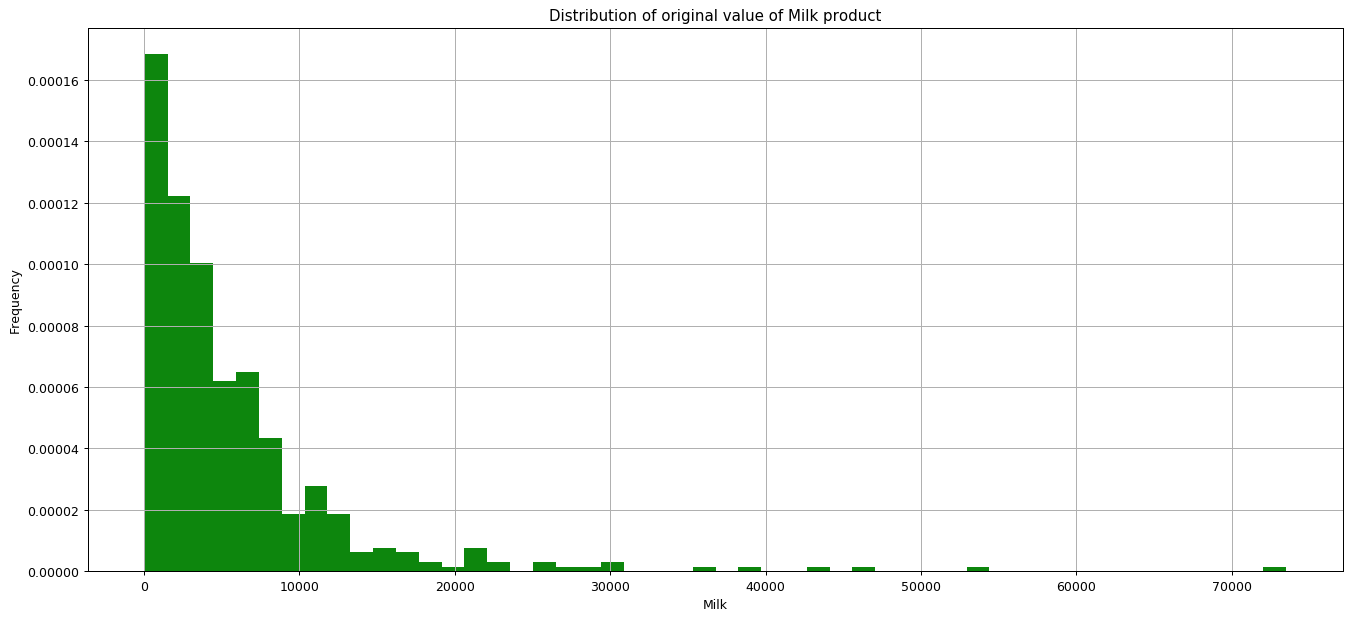

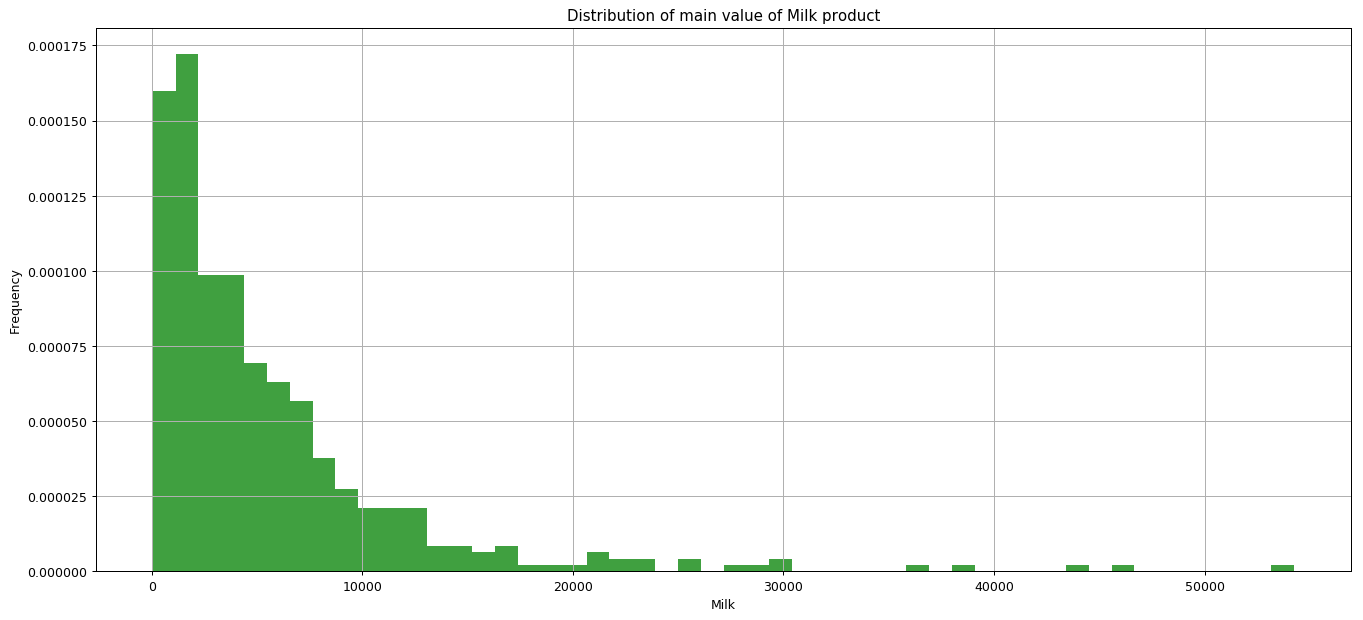

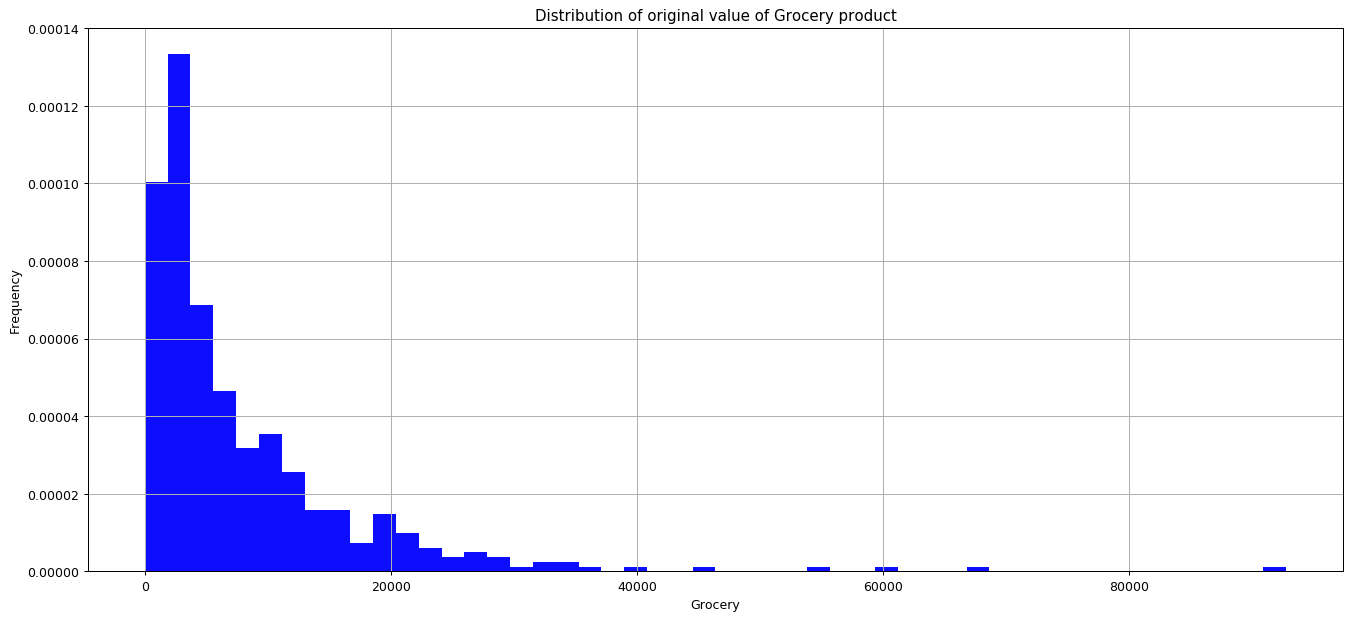

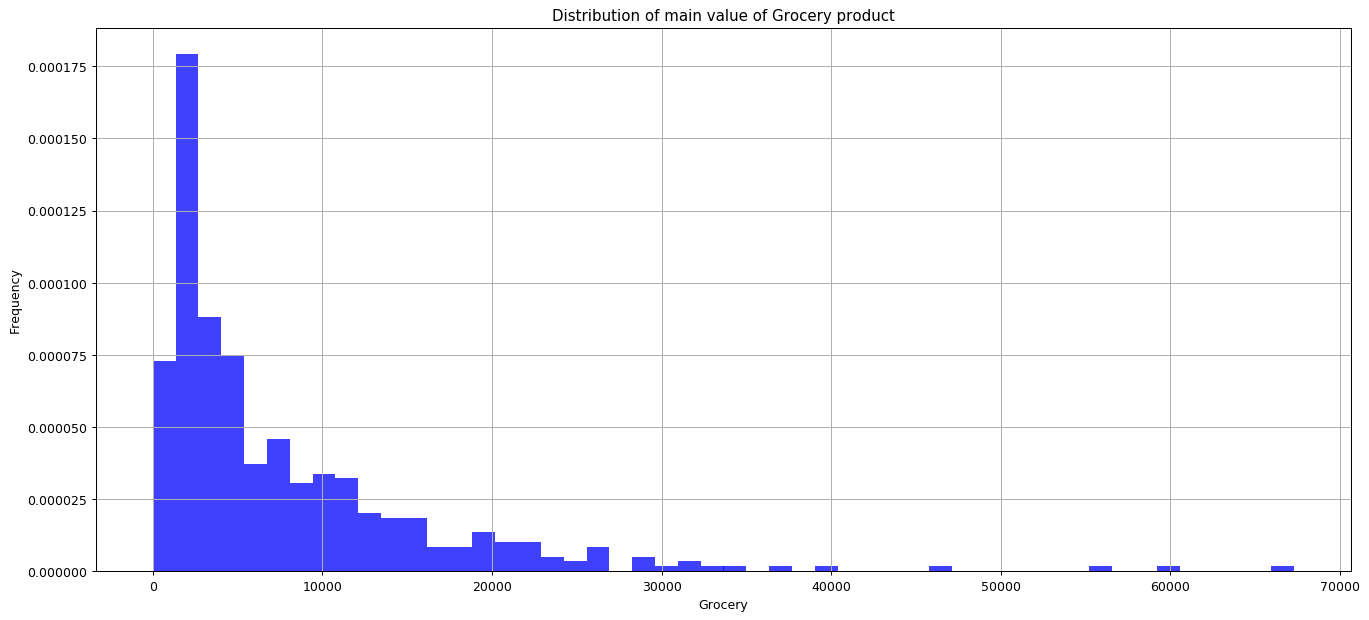

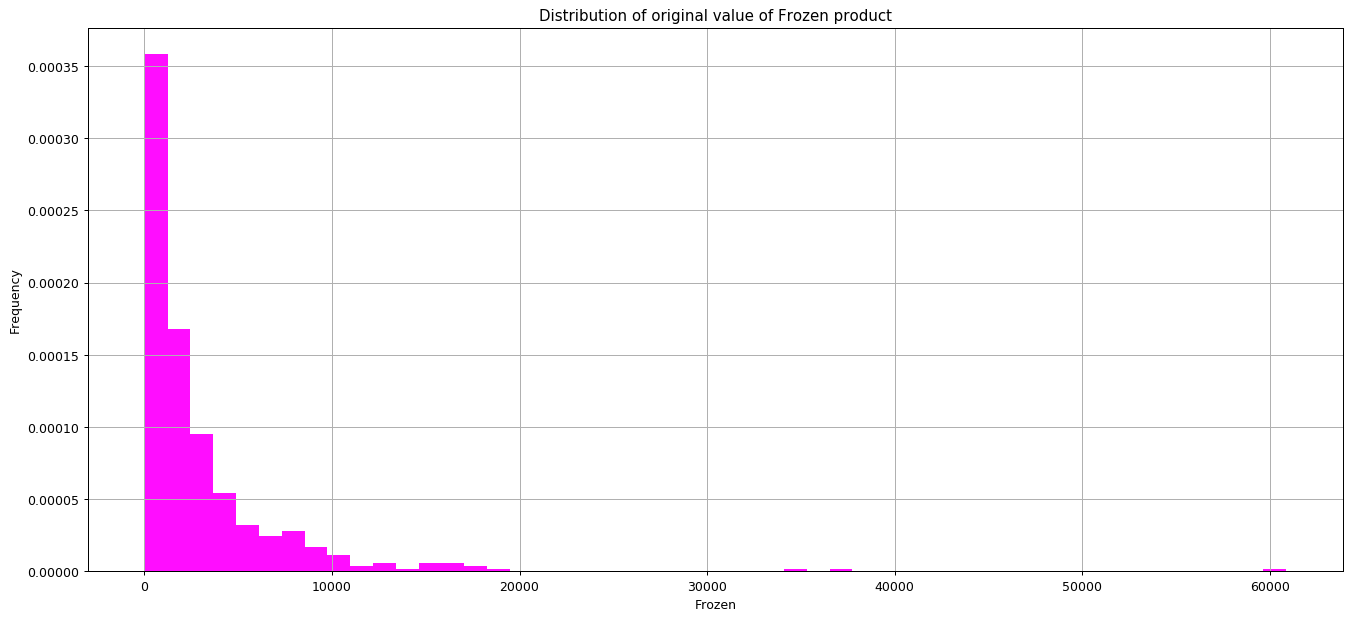

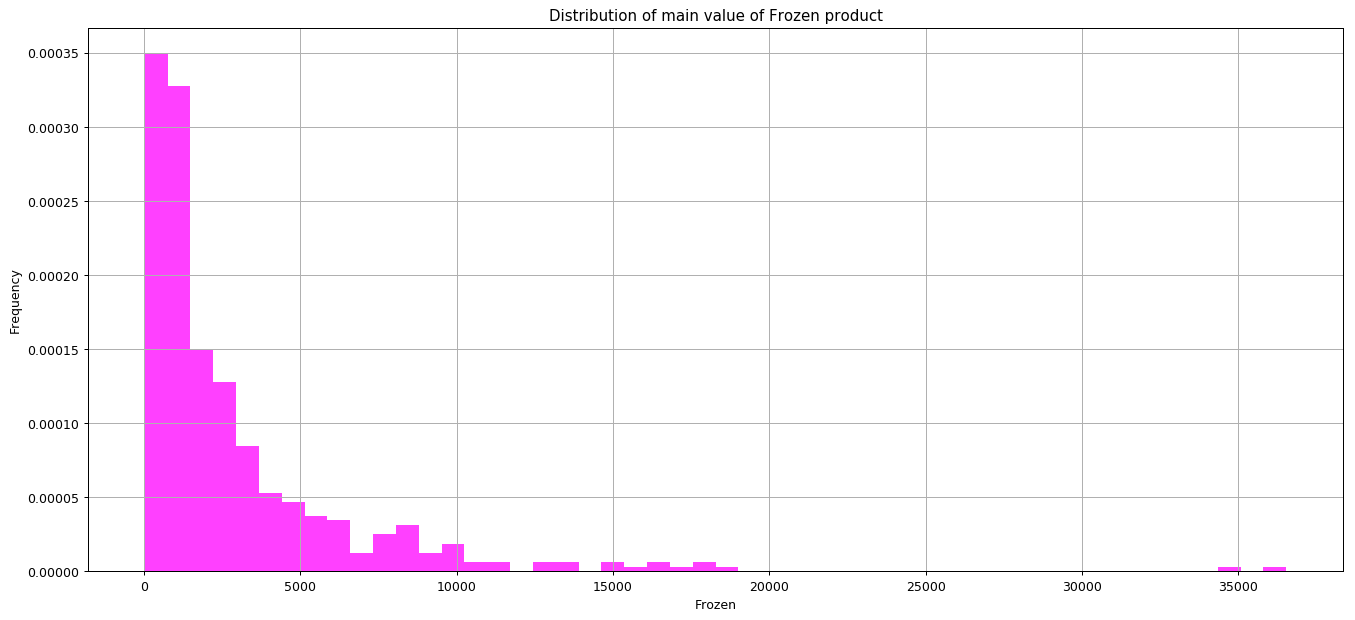

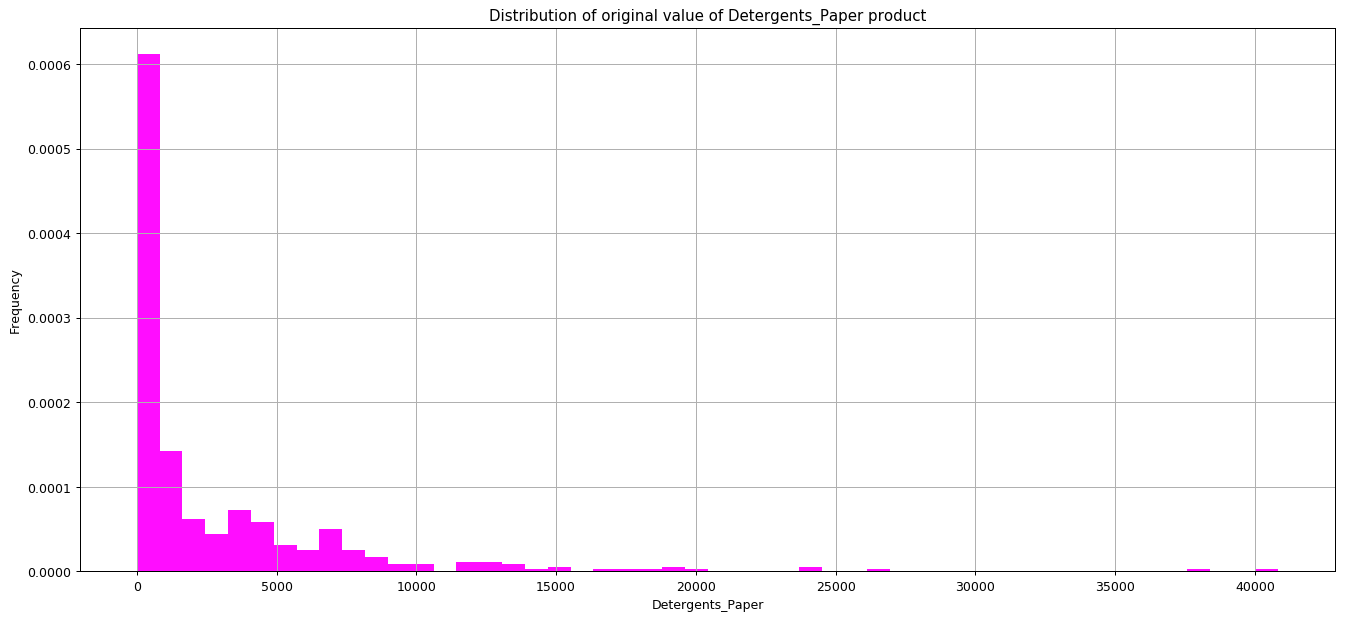

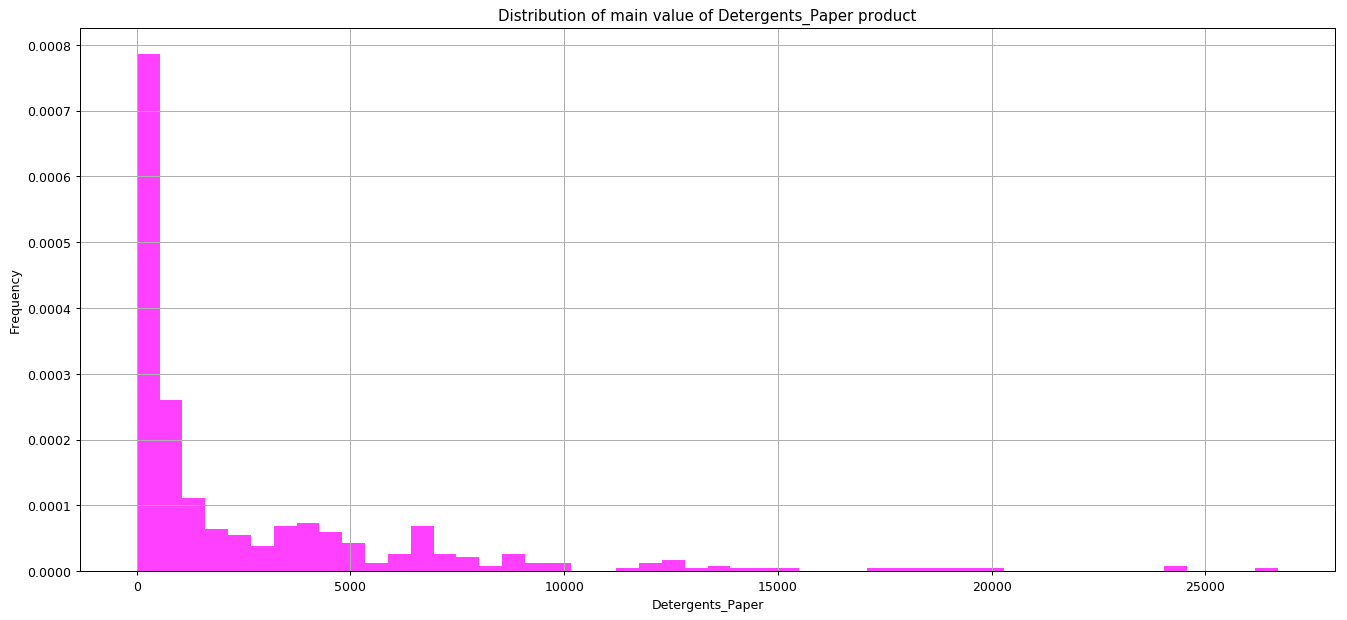

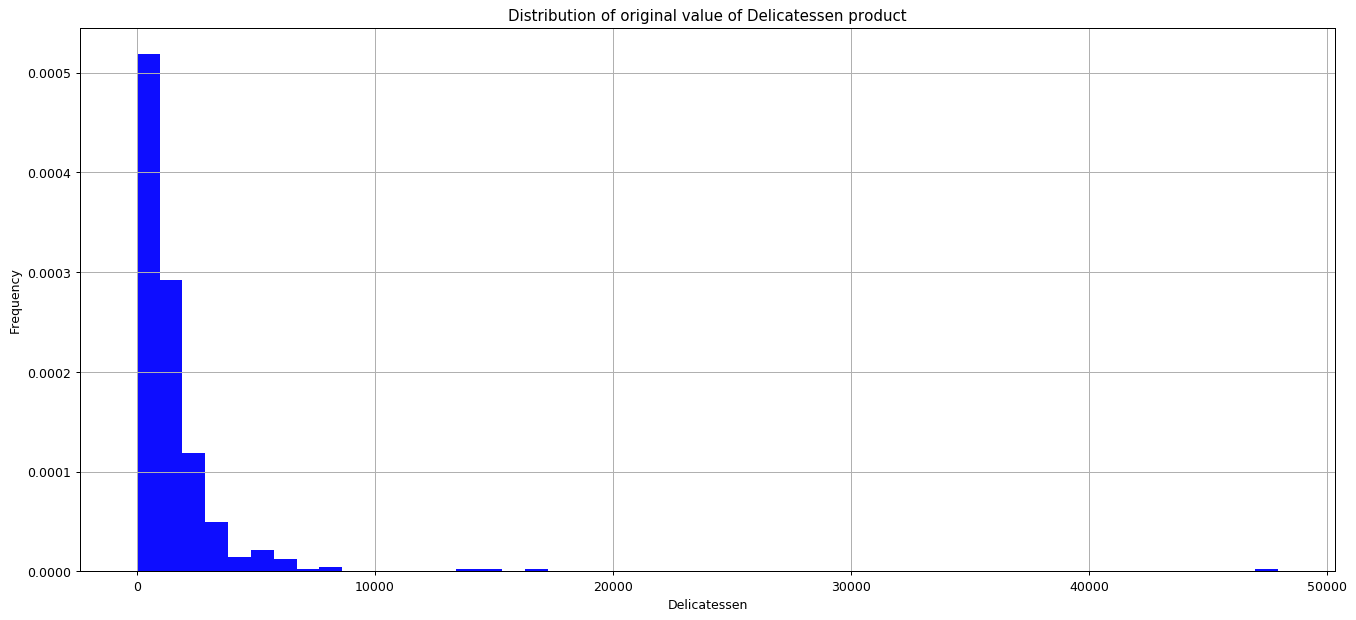

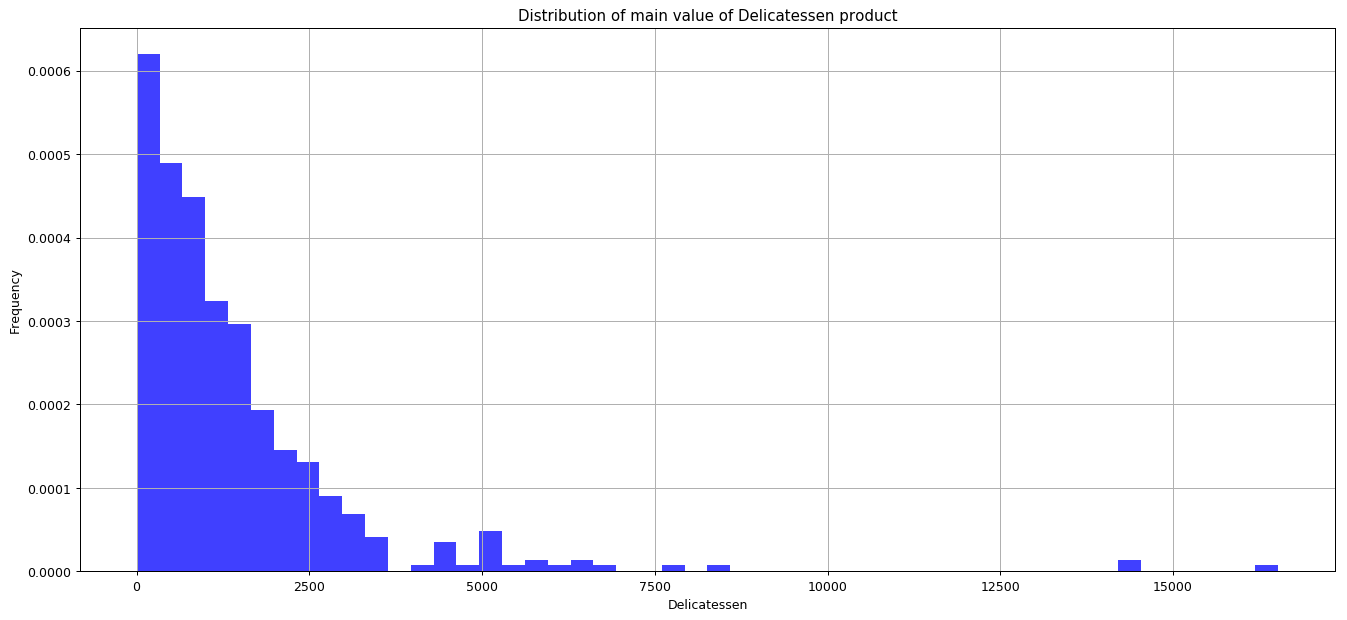

In [214]:
#print(b_outlier_upper_df.describe())
#print(b_outlier_upper_df['Fresh'])
#print(type(b_outlier_upper_df['Fresh']))
#print(b_outlier_upper_df['Milk'])
#print(type(b_outlier_upper_df['Milk']))
# remove outlier
# print(b_outlier_upper_df.dtypes)
# b_outlier_upper_df['Fresh'] = b_outlier_upper_df['Fresh'].astype(bool)
# print(b_outlier_upper_df.dtypes)
for column_name in column_name_list:
    # filter outlier upper
    column_value = customer_product_df[column_name].values
    # print(b_outlier_upper_df[column_name])
    # print(type(b_outlier_upper_df[column_name]))
    outlier_column_value = column_value[b_outlier_upper_df[column_name].values]
    # print(column_name)
    # print(outlier_column_value)
    
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(outlier_column_value.reshape(-1,1))
    column_outlier_cluster_center = kmeans.cluster_centers_
    column_outlier_cluster_label = kmeans.labels_
    # print(column_outlier_cluster_center)
    # print(column_outlier_cluster_label)
    
    column_outlier_cluster_center = column_outlier_cluster_center.flatten()
    # print(column_outlier_cluster_center)
    column_outlier_cluster_center_max = np.argmax(column_outlier_cluster_center)
    # print(column_outlier_cluster_center_max)
    
    # keep only cluster which has label as column_outlier_cluster_center_max
    column_outlier_cluster_label_modified = np.zeros(len(column_outlier_cluster_label),dtype=bool)
    column_outlier_cluster_label_modified[column_outlier_cluster_label == column_outlier_cluster_center_max] = True
    # print(column_outlier_cluster_label_modified)
    
    # update in b_outlier_upper_df
    # print(b_outlier_upper_df[column_name][b_outlier_upper_df[column_name] == True])
    b_outlier_upper_df_modified = b_outlier_upper_df[column_name][b_outlier_upper_df[column_name] == True]
    b_outlier_upper_df_modified.update(pd.Series(b_outlier_upper_df_modified.values & column_outlier_cluster_label_modified,index=b_outlier_upper_df_modified.index,dtype=bool))
    # print(b_outlier_upper_df_modified)
    # update DataFrame 
    b_outlier_upper_df.update(b_outlier_upper_df_modified)
    # b_outlier_upper_df[column_name] = b_outlier_upper_df[column_name].astype(bool)
    # print(b_outlier_upper_df[column_name][b_outlier_upper_df[column_name] == True])
    b_outlier_upper_df[column_name] = b_outlier_upper_df[column_name].astype(bool)
    # print(b_outlier_upper_df[column_name][b_outlier_upper_df[column_name] == True])
    
    # draw histogram of original data
    rand_color = color_list[random.randint(0,len(color_list)-3)]
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(column_value, bins=50, density=1, facecolor=rand_color, alpha=0.95)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of original value of ' + column_name + ' product')
    plt.grid(True)
    plt.show()
    
    # print(b_outlier_upper_df[column_name].values)
    # print(type(b_outlier_upper_df[column_name].values))
    main_column_value = column_value[~b_outlier_upper_df[column_name].values]
    # draw histogram of main value data
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(main_column_value, bins=50, density=1, facecolor=rand_color, alpha=0.75)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of main value of ' + column_name + ' product')
    plt.grid(True)
    plt.show()

In [258]:
#b_outlier_upper_df.drop(['summary'],axis=1,inplace=True)
i_outlier_upper_df = b_outlier_upper_df.astype(int)
i_outlier_upper_df['summary'] = i_outlier_upper_df.sum(axis=1)
# print(i_outlier_upper_df.head())
# print(i_outlier_upper_df.describe())
# print(i_outlier_upper_df.dtypes)
# print(i_outlier_upper_df['summary'].values)
# print(np.sum(i_outlier_upper_df['summary'].values))
# print(i_outlier_upper_df['summary'] > 0)
i_outlier_upper_df.loc[i_outlier_upper_df['summary'] > 0, 'summary'] = 1
num_outlier_record = np.sum(i_outlier_upper_df['summary'].values)
print('There are',num_outlier_record,'outlier records')
print(customer_product_df[i_outlier_upper_df['summary'] > 0])

There are 6 outlier records
      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
85    16117  46197    92780    1026             40827          2944
86    22925  73498    32114     987             20070           903
181  112151  29627    18148   16745              4948          8550
183   36847  43950    20170   36534               239         47943
325   32717  16784    13626   60869              1272          5609
333    8565   4980    67298     131             38102          1215


In [236]:
customer_main_product_df = customer_product_df[i_outlier_upper_df['summary'] == 0]
print(customer_main_product_df.describe())
print(customer_main_product_df.head())
print('There are',customer_main_product_df.shape[0],'main customer records')

              Fresh          Milk       Grocery        Frozen  \
count    434.000000    434.000000    434.000000    434.000000   
mean   11637.808756   5380.923963   7498.677419   2846.447005   
std    11666.891741   5978.540285   8037.150522   3615.426198   
min        3.000000     55.000000      3.000000     25.000000   
25%     3098.500000   1515.750000   2146.250000    738.750000   
50%     8257.500000   3607.500000   4725.000000   1526.000000   
75%    16724.500000   7091.500000  10391.000000   3519.750000   
max    76237.000000  54259.000000  59598.000000  35009.000000   

       Detergents_Paper  Delicatessen  
count        434.000000    434.000000  
mean        2678.338710   1391.195853  
std         4012.680087   1706.148925  
min            3.000000      3.000000  
25%          256.250000    405.250000  
50%          811.000000    960.500000  
75%         3879.250000   1783.000000  
max        26701.000000  16523.000000  
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Del

### Transform the data by applying natural logarithm

In [238]:
customer_main_transform_df = customer_main_product_df.apply(np.log)
print(customer_main_transform_df.head())
print(customer_main_transform_df.describe())
print(customer_main_transform_df.dtypes)

       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446913  9.175335  8.930759  5.365976          7.891331      7.198931
1   8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
2   8.756682  9.083416  8.946896  7.785305          8.165079      8.967504
3   9.492884  7.086738  8.347827  8.764678          6.228511      7.488853
4  10.026369  8.596004  8.881558  8.272571          7.482682      8.553525
            Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  434.000000  434.000000  434.000000  434.000000        434.000000   
mean     8.709951    8.092365    8.414618    7.287241          6.759502   
std      1.476850    1.055659    1.097488    1.260655          1.703546   
min      1.098612    4.007333    1.098612    3.218876          1.098612   
25%      8.038673    7.323651    7.671477    6.604951          5.546152   
50%      9.018877    8.190770    8.460618    7.330388          6.698268   
75%      9.724630    8.86

### Draw histogram after natural logarithm transformation

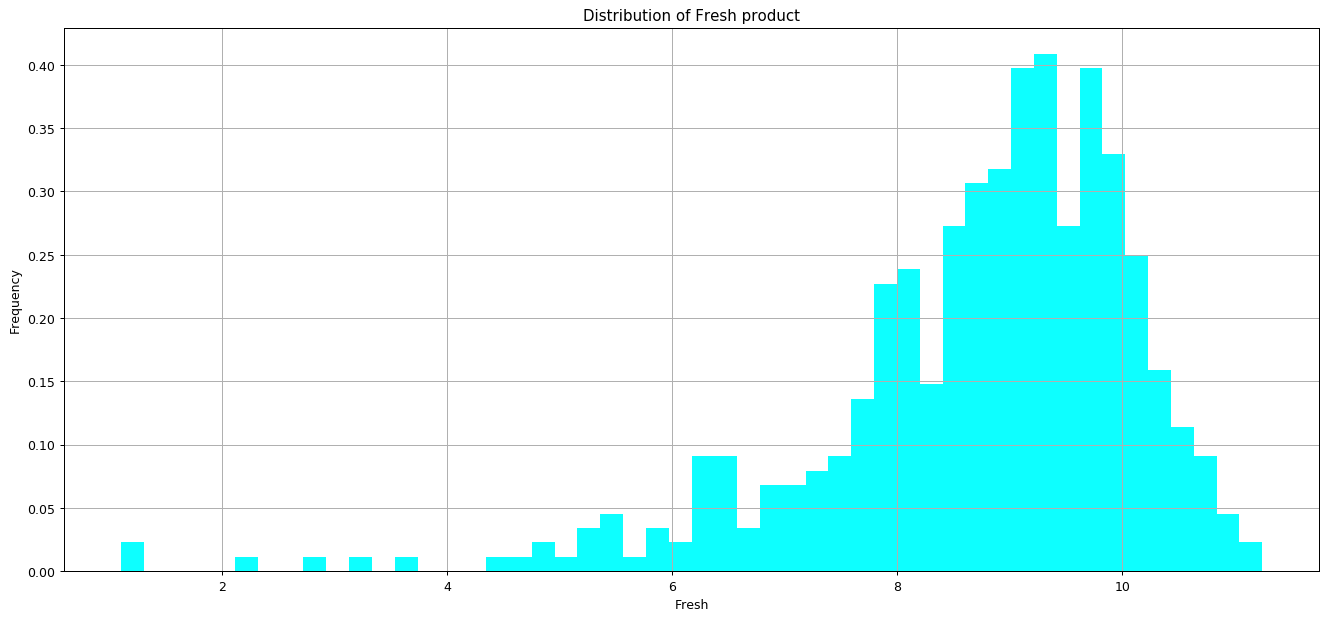

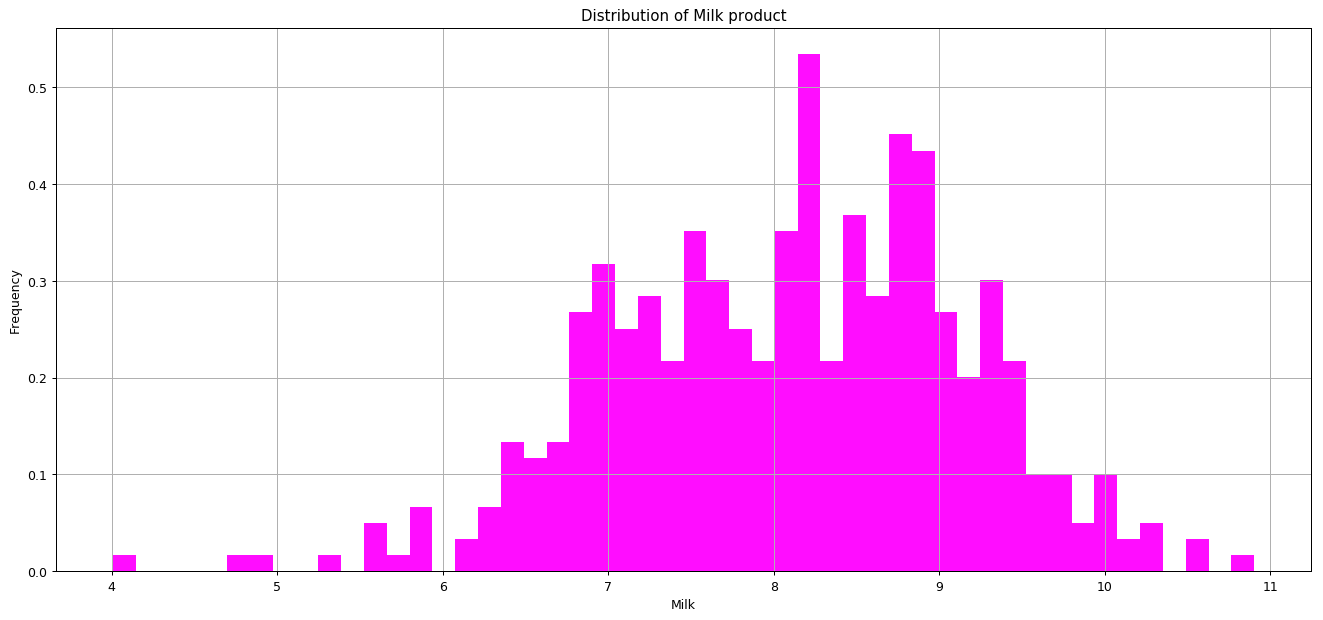

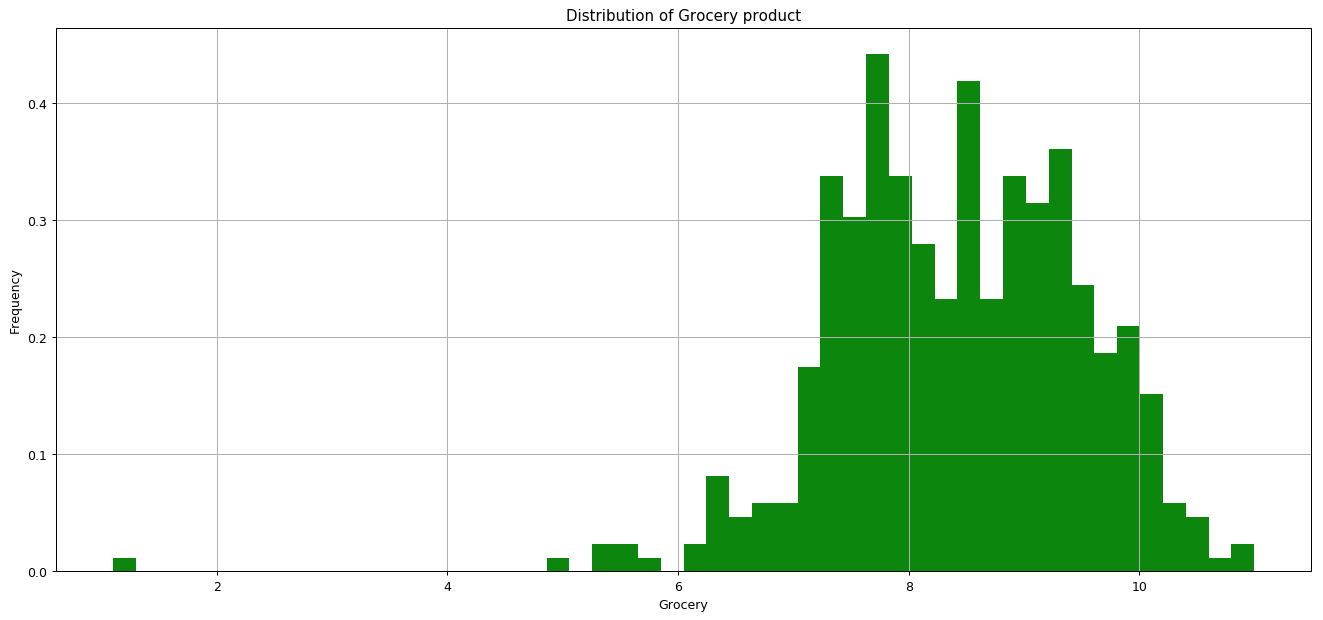

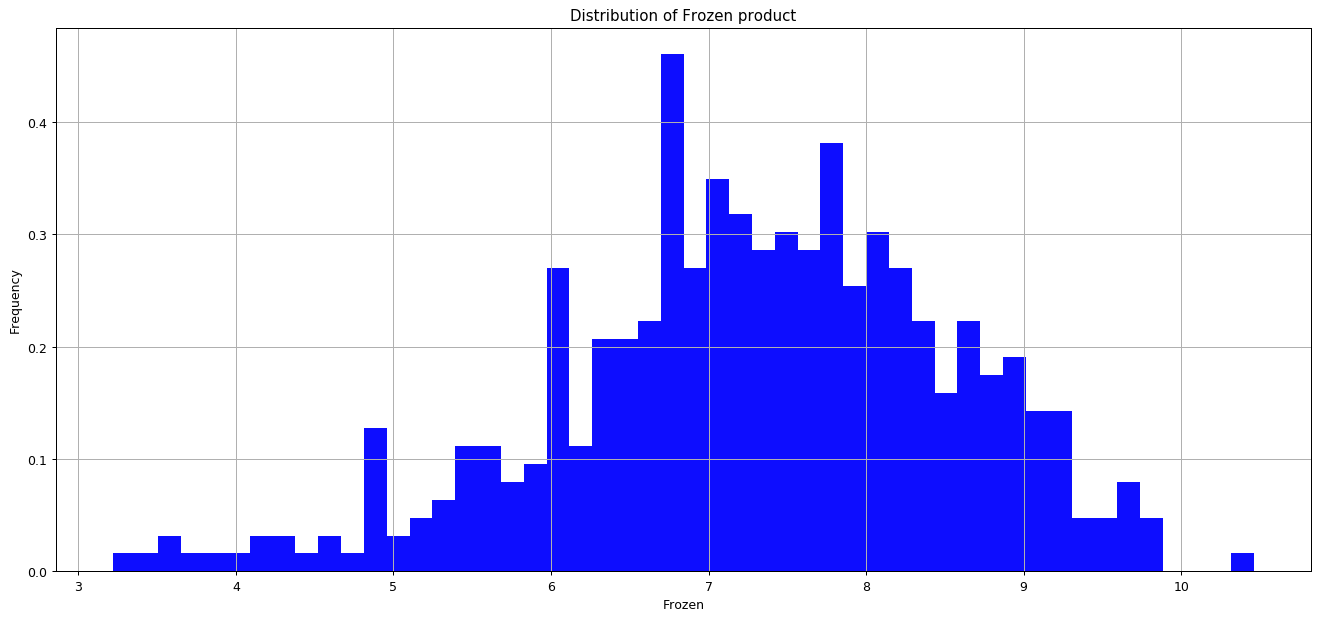

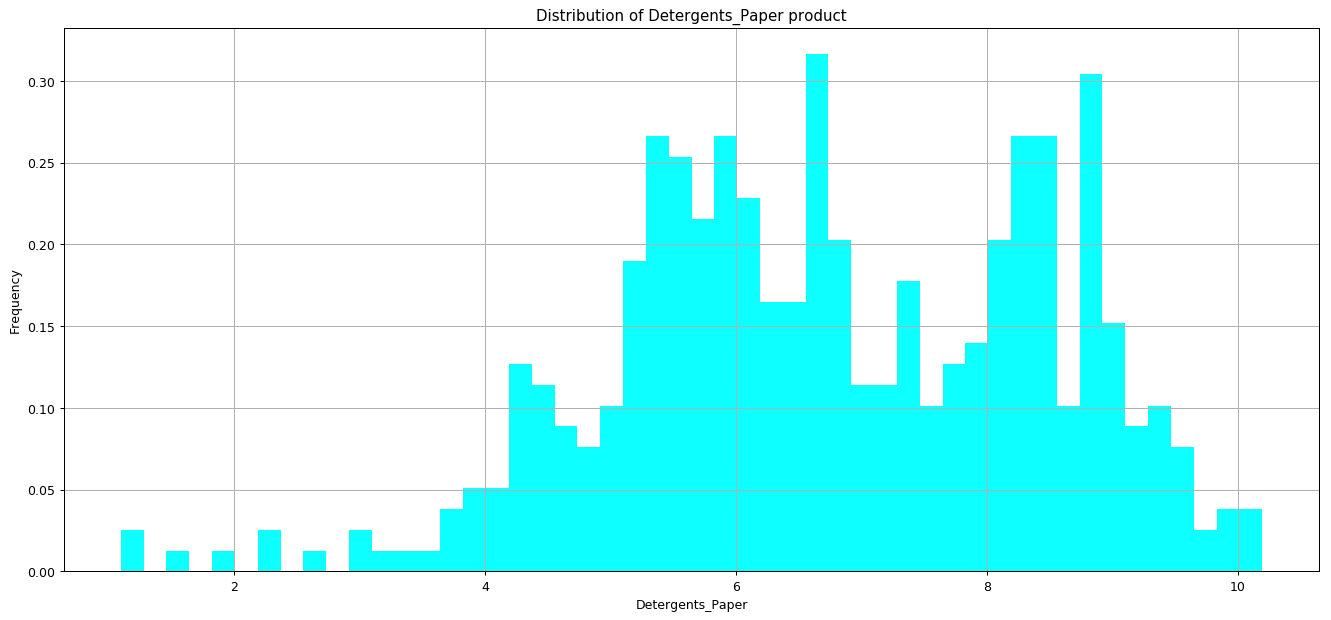

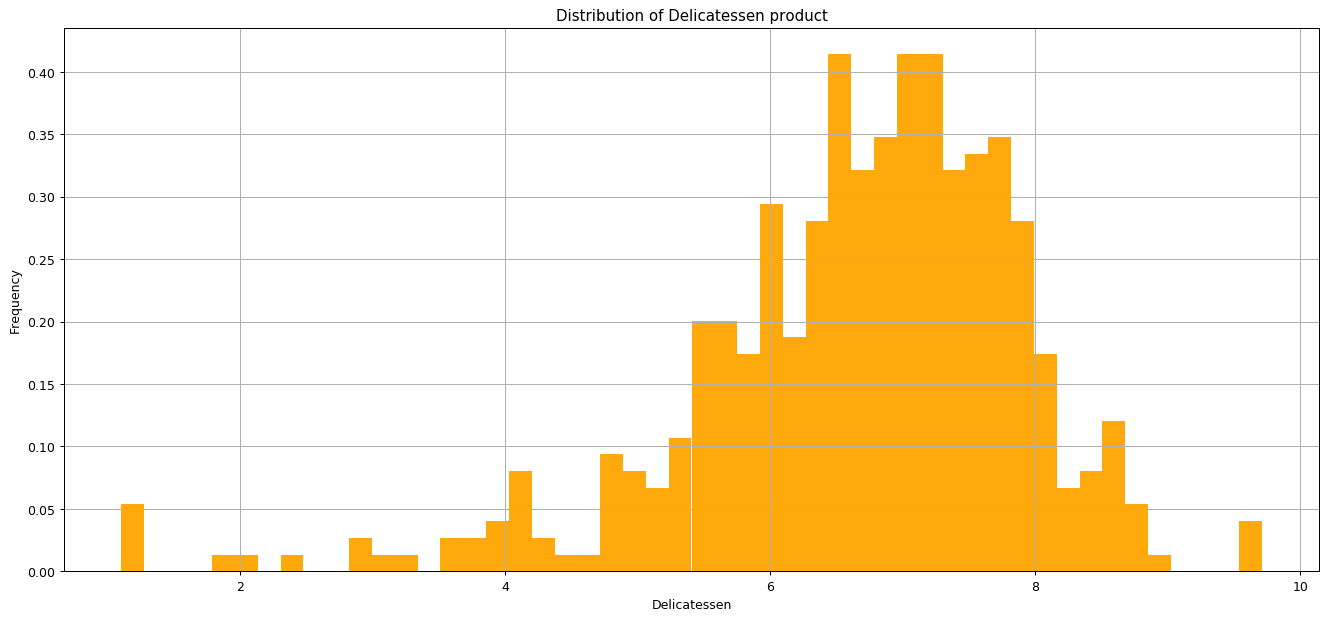

In [240]:
for column_name in column_name_list:
    rand_color = color_list[random.randint(0,len(color_list)-3)]
    column_series = customer_main_transform_df[column_name]
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(column_series.values, bins=50, density=1, facecolor=rand_color, alpha=0.95)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + column_name + ' product')
    plt.grid(True)
    plt.show()

### Now the data looks like normal distribution, apply Standard Scaler transformation

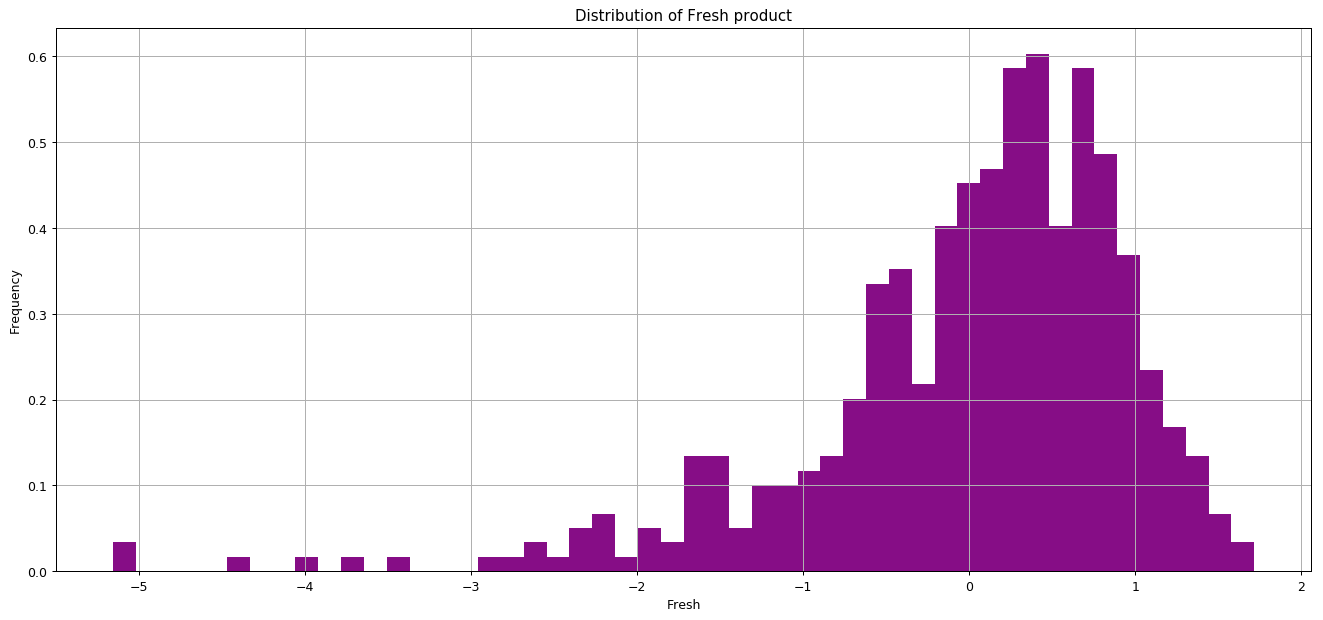

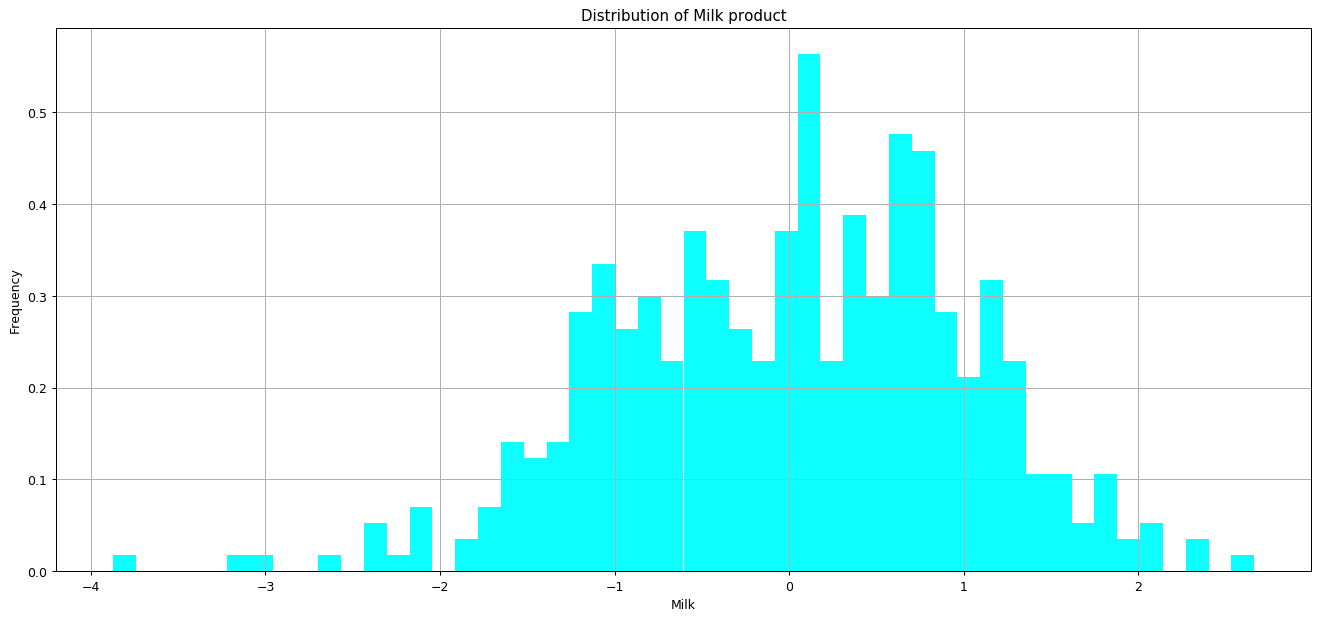

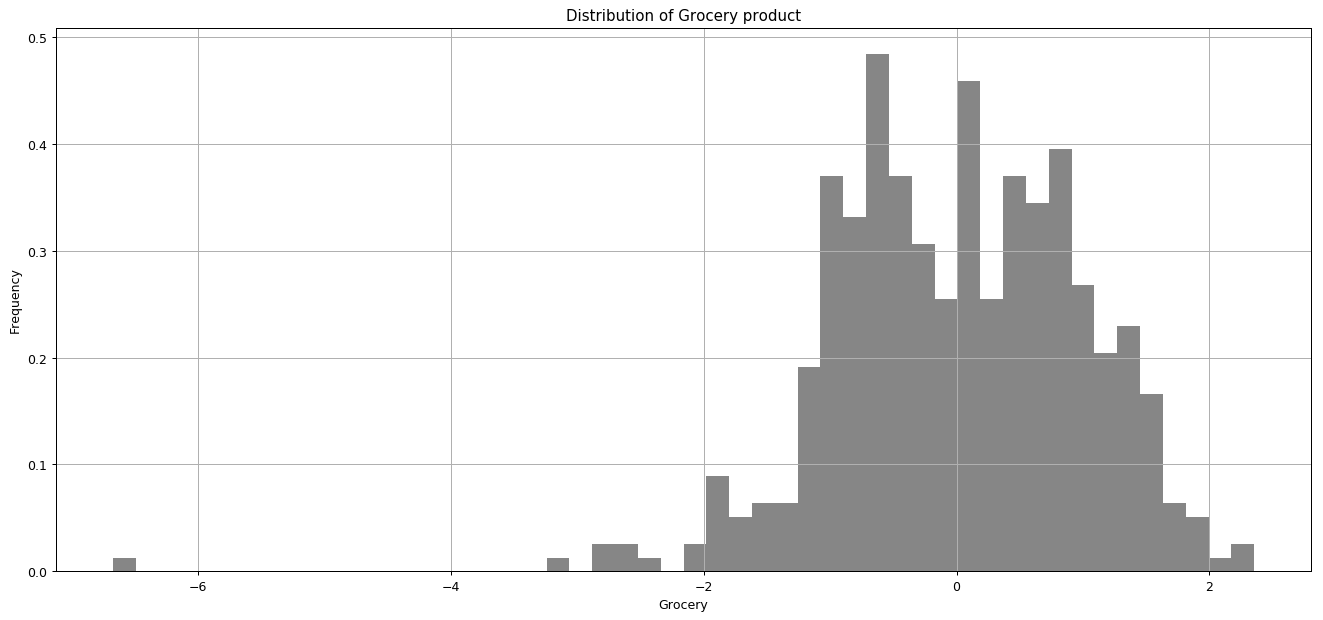

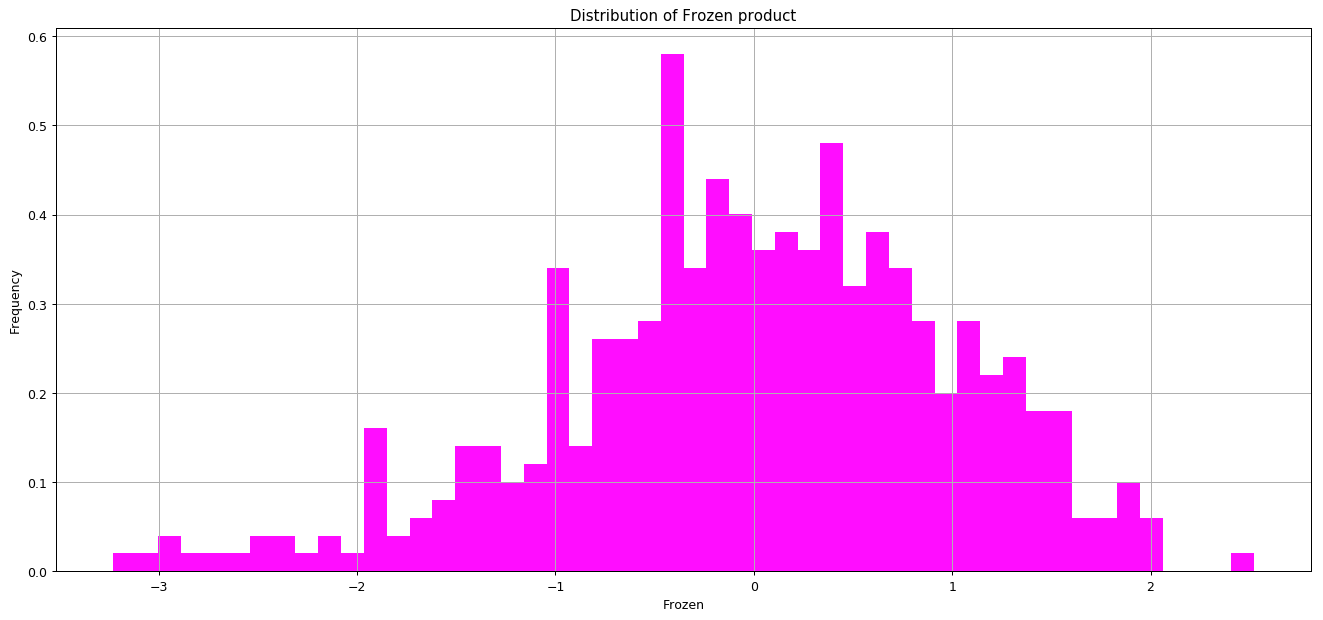

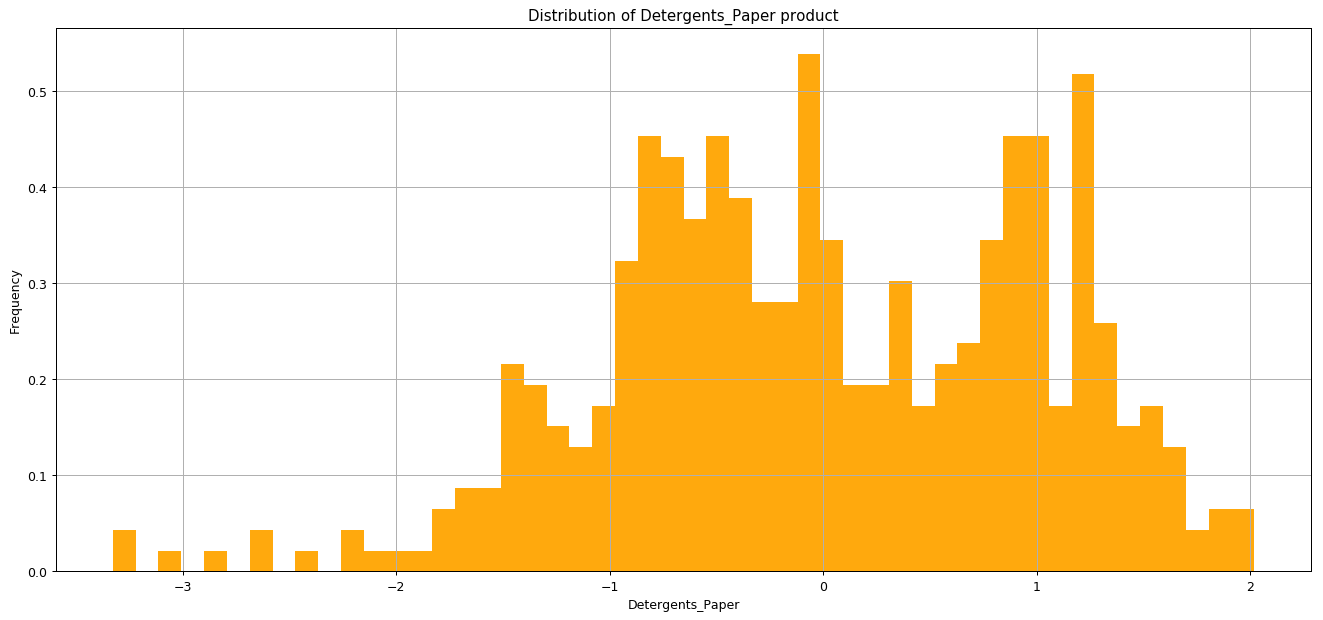

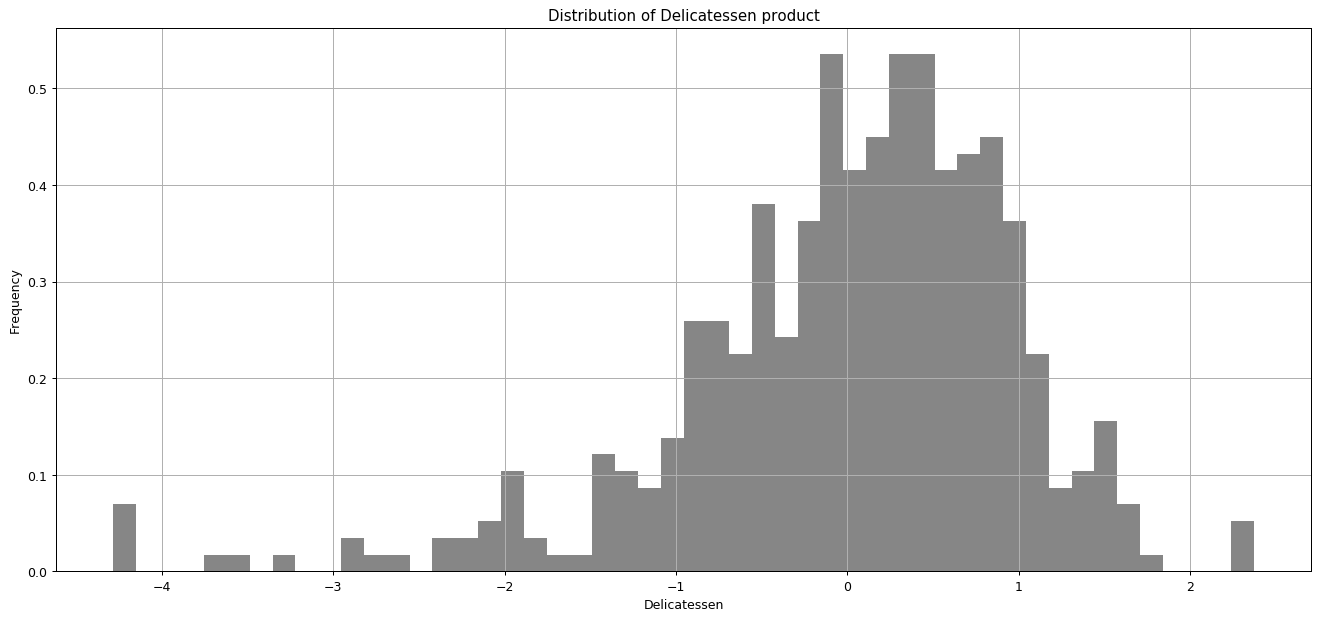

In [247]:
from sklearn.preprocessing import StandardScaler
for column_name in column_name_list:
    rand_color = color_list[random.randint(0,len(color_list)-3)]
    scaler = StandardScaler()
    scaler.fit(customer_main_transform_df[column_name].values.reshape(-1,1))
    value_transformed = scaler.transform(customer_main_transform_df[column_name].values.reshape(-1,1))
    # print(value_transformed)
    customer_main_transform_df[column_name] = pd.Series(value_transformed.flatten(), index=customer_main_transform_df[column_name].index)
    # draw using plt
    fig=plt.figure(figsize=(18, 8), dpi= 90)
    plt.hist(customer_main_transform_df[column_name].values, bins=50, density=1, facecolor=rand_color, alpha=0.95)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Distribution of ' + column_name + ' product')
    plt.grid(True)
    plt.show()

### Calculate covariance of feature columns

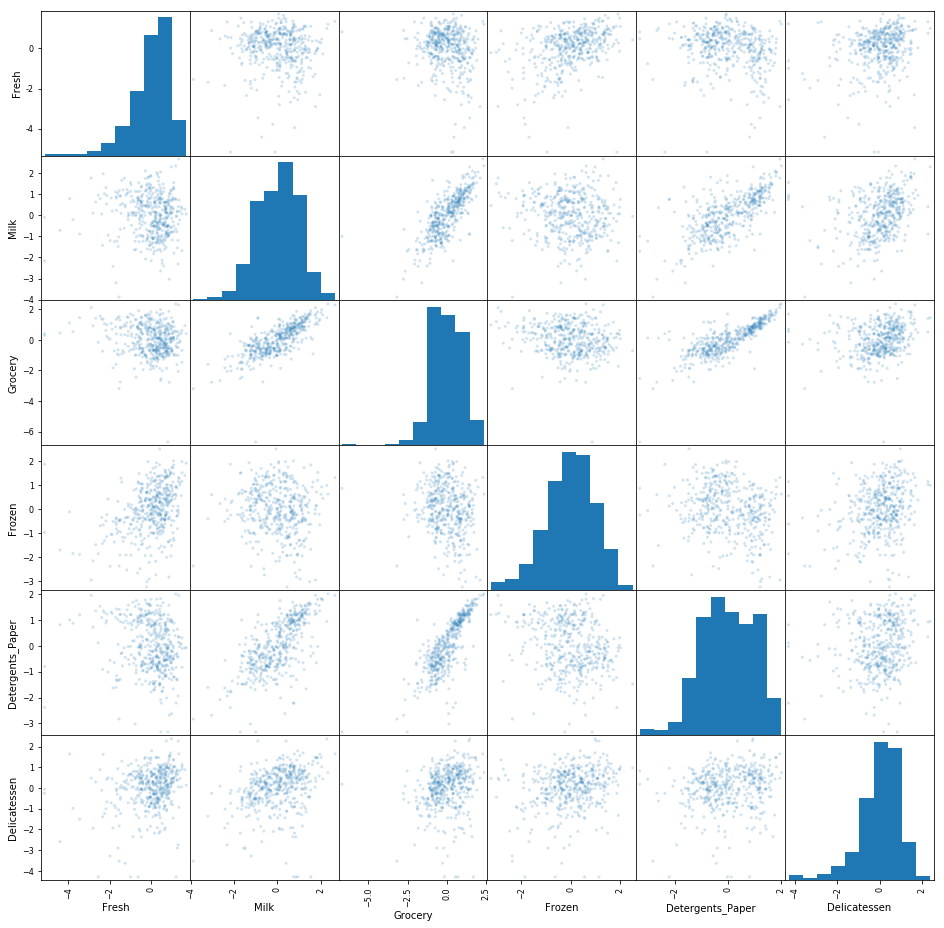

In [249]:
pd.plotting.scatter_matrix(customer_main_transform_df, alpha=0.2, figsize=(16,16))
plt.show()

In [250]:
customer_main_transform_df.cov()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.002309 -0.051117 -0.158715  0.376868         -0.171838   
Milk             -0.051117  1.002309  0.756051 -0.087348          0.684072   
Grocery          -0.158715  0.756051  1.002309 -0.179633          0.795974   
Frozen            0.376868 -0.087348 -0.179633  1.002309         -0.210198   
Detergents_Paper -0.171838  0.684072  0.795974 -0.210198          1.002309   
Delicatessen      0.239744  0.316638  0.218812  0.231864          0.166126   

                  Delicatessen  
Fresh                 0.239744  
Milk                  0.316638  
Grocery               0.218812  
Frozen                0.231864  
Detergents_Paper      0.166126  
Delicatessen          1.002309

## cov(Grocery,Detergents_Paper) = 0.796 
## cov(Grocery,Milk) = 0.684
so there may be positive correlation between (Grocery,Detergent_Paper);(Grocery,Milk)

### Run PCA to reduce the number of dimensions from 6 features to 2 principal features

In [251]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_main_transform_df)

principal_df = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])
print(principal_df.head())
print(principal_df.describe())

        pc1       pc2
0 -1.452492  0.213041
1 -1.470080 -0.643564
2 -1.510559 -1.353015
3  0.862708 -1.216043
4 -0.762328 -1.849636
                pc1           pc2
count  4.340000e+02  4.340000e+02
mean   3.274390e-17  2.455793e-17
std    1.629179e+00  1.260032e+00
min   -4.210738e+00 -2.835584e+00
25%   -1.340994e+00 -7.673151e-01
50%    9.067534e-02 -1.461875e-01
75%    1.191573e+00  6.779037e-01
max    6.392038e+00  5.101277e+00


### Visualize two principal components of entire dataset

[[ 0.13871542 -0.53818334 -0.56860454  0.16535691 -0.55148567 -0.19059449]
 [-0.58695963 -0.14668277 -0.01752991 -0.57774679  0.02932887 -0.54681233]]
(2, 6)


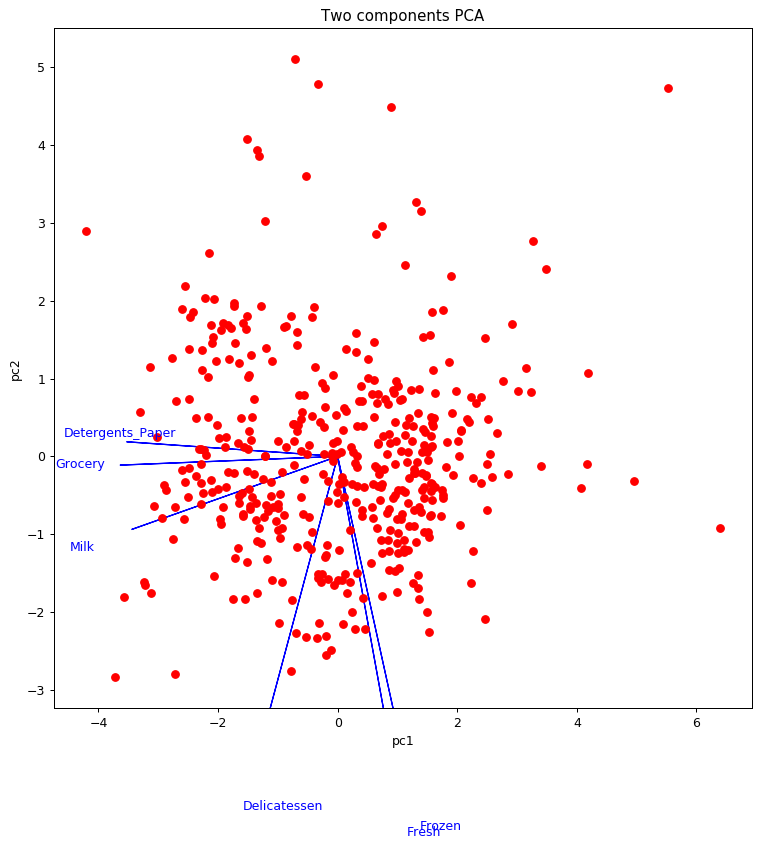

In [268]:
variance_direction = pca.components_[0:2,:]

fig=plt.figure(figsize=(10, 10), dpi= 90, facecolor='w', edgecolor='k')
fig.add_subplot(111)
#fig.subplots_adjust(bottom=0.1)
plt.plot(principal_df['pc1'].values,principal_df['pc2'].values, 'ro')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Two components PCA')

# draw variance_direction of existing features
print(variance_direction)
print(variance_direction.shape)
scale = max(np.amax(principal_df['pc1'].values),np.amax(principal_df['pc2'].values))
for i in range(variance_direction.shape[1]):
    plt.arrow(0, 0, variance_direction[0,i]*scale,variance_direction[1,i]*scale, color='b', width=0.0005, head_width=0.0025)
    plt.text(variance_direction[0,i]*scale*1.3, variance_direction[1,i]*scale*1.3, column_name_list[i], color='b')
plt.show()

### From the above figure, we can have some conclusions about relationship between products
- a point on the left corner corresponding to a customer who spends on a lot of three products (Detegents_Paper, Grocery, Milk) 
- a point on the bottom corner corresponding to a customer who spends on a lot of three products (Delicatessen, Fresh, Frozen)

### K-means Clustering and optimize parameters
- run K-means clustering with various n_cluster parameter
- optimize n_cluster and find the best one

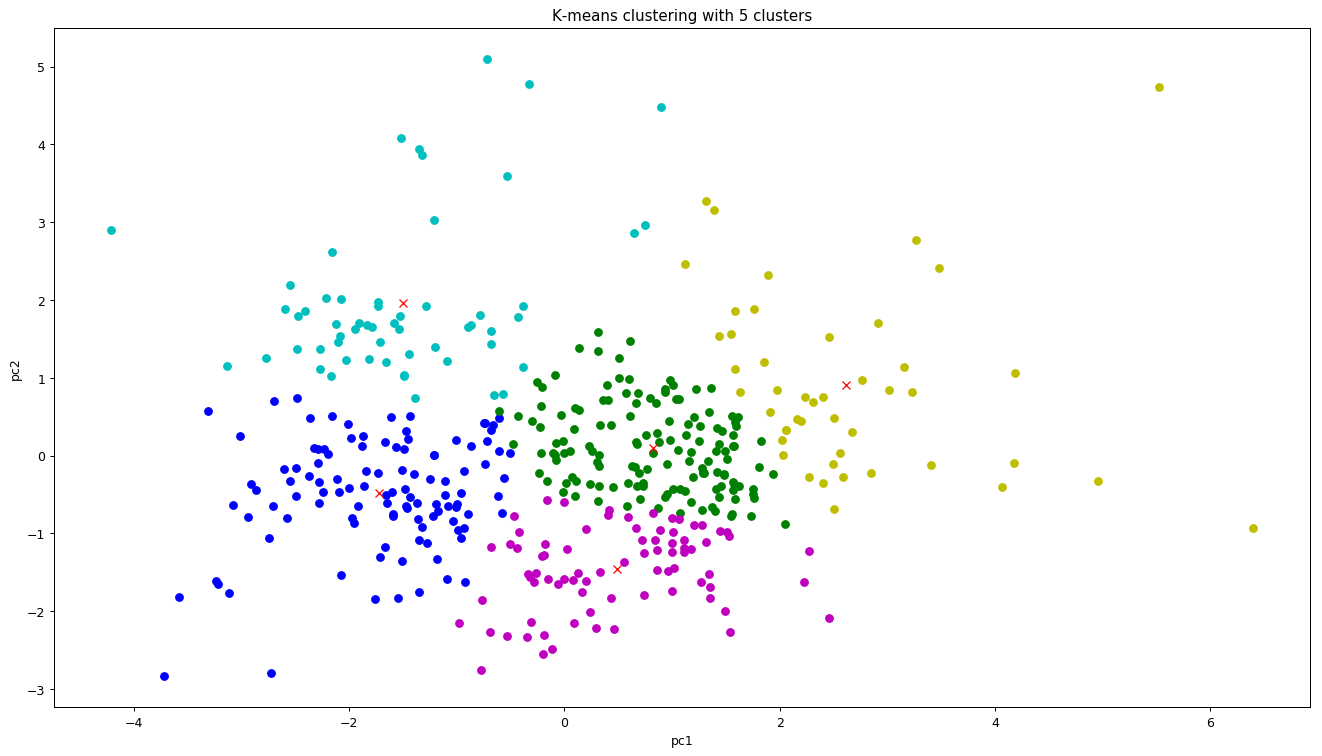

In [283]:
data_point = np.empty(shape=(principal_df.shape[0],2))
data_point[:,0] = principal_df['pc1'].values
data_point[:,1] = principal_df['pc2'].values
#print(data_point)
#print(data_point.shape)
# run KMeans with 5 clusters
num_cluster = 5
kmeans = KMeans(n_clusters=num_cluster)
kmeans.fit(data_point)
center_point = kmeans.cluster_centers_
# print(center_point)

# draw data_point and center_point
fig=plt.figure(figsize=(18, 10), dpi= 90, facecolor='w', edgecolor='k')
fig.add_subplot(111)
color_list_fix = ['yellow', 'blue', 'gray', 'magenta', 'cyan', 'green', 'orange', 'black']
for i in range(0,num_cluster):
    rand_color = color_list_fix[i]
    plt.plot(data_point[:,0][kmeans.labels_ == i],data_point[:,1][kmeans.labels_ == i], rand_color[0] + 'o')
plt.plot(center_point[:,0],center_point[:,1], 'rx')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('K-means clustering with 5 clusters')
plt.show()

### Compare with two columns ['Channel', 'Region']

In [289]:
#print(customer_main_transform_df.index)
#print(channel_column)
channel_copy = channel_column.loc[customer_main_transform_df.index].copy()
channel_map = {}
for channel_item in channel_copy:
    if channel_item in channel_map:
        channel_map[channel_item] += 1
    else:
        channel_map[channel_item] = 1

region_copy = region_column.loc[customer_main_transform_df.index].copy()
region_map = {}
for region_item in region_copy:
    if region_item in region_map:
        region_map[region_item] += 1
    else:
        region_map[region_item] = 1
#print(channel_copy)
#print(region_column)
print(channel_map)
print(region_map)

{2: 139, 1: 295}
{3: 312, 1: 77, 2: 45}


There are 2 channels and 3 regions

### Draw data point based on channels and regions

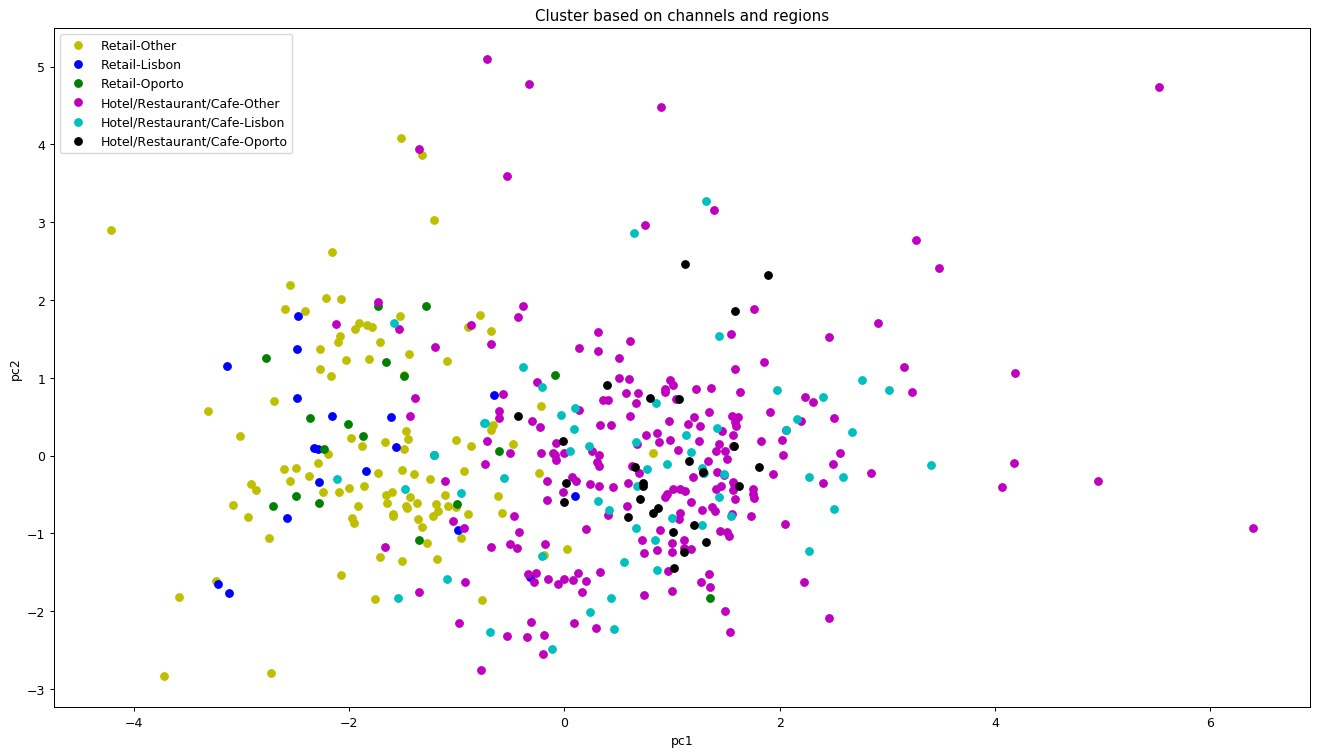

In [308]:
channel_map_name = {
    1: 'Hotel/Restaurant/Cafe',
    2: 'Retail'
}
region_map_name = {
    1: 'Lisbon',
    2: 'Oporto',
    3: 'Other'
}

channel_key_list = list(channel_map.keys())
region_key_list = list(region_map.keys())
#print(channel_key_list)
#print(region_key_list)
#print(channel_copy)
channel_copy_reset_index = channel_copy.reset_index()
#print(channel_copy_reset_index)

region_copy_reset_index = region_copy.reset_index()

#filter_both = filter_channel & filter_region
#print(filter_both)

# draw data_point with channel and region
fig=plt.figure(figsize=(18, 10), dpi= 90, facecolor='w', edgecolor='k')
fig.add_subplot(111)
color_list_fix = ['yellow', 'blue', 'green', 'magenta', 'cyan', 'k', 'orange', 'black']

num_channel = len(channel_key_list)
num_region = len(region_key_list)
for i in range(0,num_channel):
    for j in range(0,num_region):
        rand_color = color_list_fix[i * num_region + j]
        filter_channel = channel_copy_reset_index['Channel'] == channel_key_list[i]
        filter_region = region_copy_reset_index['Region'] == region_key_list[j]
        filter_both = filter_channel & filter_region
        plt.plot(data_point[:,0][filter_both],data_point[:,1][filter_both], rand_color[0] + 'o', label=channel_map_name[channel_key_list[i]] + '-' + region_map_name[region_key_list[j]])
        # plt.legend([c],[channel_map_name[channel_key_list[i]] + region_map_name[region_key_list[j]]])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Cluster based on channels and regions')
plt.legend()
plt.show()

### We can recognize some characteristics
- Retail customer at location (Lisbon,Other) usually buy a lot of three products (Detegents_Paper, Grocery, Milk)
- Hotel/Restaurant/Cafe at location (Lisbon,Other) usually buy more products (Delicatessen, Fresh, Frozen) than other customers